<a href="https://colab.research.google.com/github/danadler-dev/MDPI-Article-Evo/blob/main/HowInfoEvolves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gen 1: Counter({'A': 10, 'B': 10, 'C': 10})
Gen 2: Counter({'AB': 7, 'B': 6, 'BC': 6, 'C': 3, 'A': 2, 'AC': 1})
Gen 3: Counter({'BC': 11, 'AB': 10, 'B': 9, 'ABC': 8, 'C': 2, 'AC': 2})
Gen 4: Counter({'ABC': 18, 'BC': 12, 'AB': 11, 'B': 5, 'A': 2, 'C': 1})
Gen 5: Counter({'ABC': 26, 'AB': 18, 'BC': 11, 'B': 3, 'A': 1, 'C': 1})
Gen 6: Counter({'ABC': 38, 'AB': 13, 'BC': 10, 'B': 2, 'C': 1, 'A': 1})
Gen 7: Counter({'ABC': 52, 'AB': 11, 'BC': 9, 'A': 2, 'C': 2, 'B': 1})


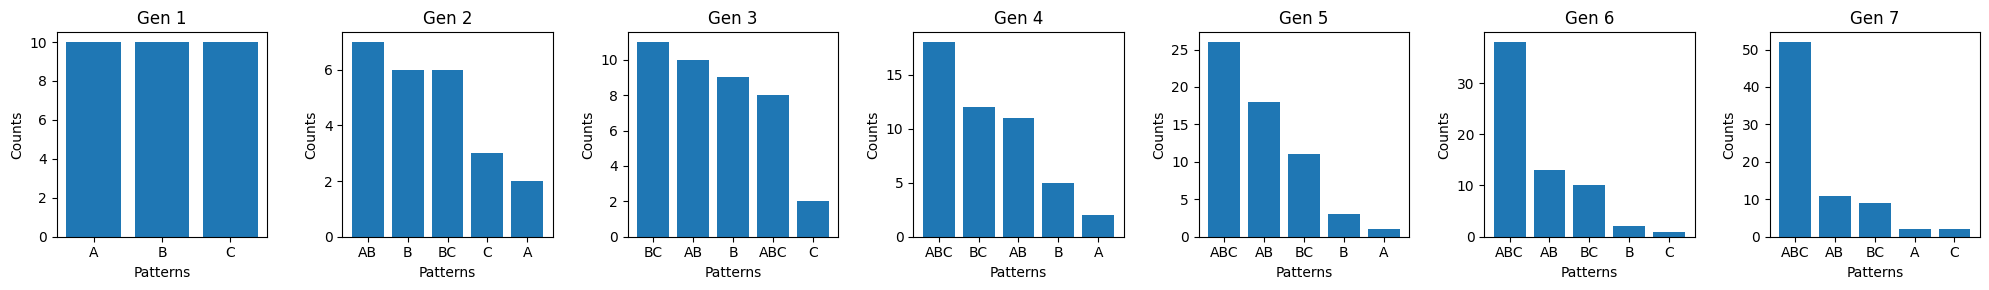

In [21]:
import random
import matplotlib.pyplot as plt
from collections import Counter

def simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population):
    """
    Simulate a simple case with three elements {A, B, C} and stability bias for compounds involving B.

    Args:
        num_generations (int): Number of generations to simulate.
        interactions_per_generation (int): Number of interactions per generation.
        regeneration_rate (dict): Number of each base symbol regenerated each generation.
        initial_population (list): Initial population of symbols.

    Returns:
        None: Plots the dynamics of the population over generations.
    """
    # Stability values for compounds
    stability = {
        "AB": 3, "BC": 3, "ABC": 5,  # High stability for B-compounds
        "AC": 1, "A": 1, "B": 2, "C": 1  # Lower stability for others
    }

    population = initial_population.copy()

    fig, axes = plt.subplots(1, num_generations,figsize=(20, 3))
    axes = axes.flatten()

    for generation in range(num_generations):
       # Count and plot top patterns
        population_count = Counter(population)
        top_patterns = population_count.most_common(5)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Gen {generation+1}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        # Regenerate base elements
        for symbol, rate in regeneration_rate.items():
            population.extend([symbol] * rate)

        # Simulate interactions
        new_population = []
        for _ in range(interactions_per_generation):
            symbol1, symbol2 = random.sample(population, 2)
            compound = "".join(sorted(symbol1 + symbol2))  # Sort to avoid duplicate representations
            if compound in stability:
                new_population.append(compound)
            else:
                # If the compound is invalid, add the original symbols back
                new_population.extend([symbol1, symbol2])

        # Age compounds by their stability
        aged_population = []
        for compound in new_population:
            if random.random() < (stability.get(compound, 0) / 5):  # Normalize by max stability
                aged_population.append(compound)
        population = aged_population



        print(f"Gen {generation+1}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for the simulation
num_generations = 7
interactions_per_generation = 50
regeneration_rate = {"A": 5, "B": 5, "C": 5}  # Regenerate all elements equally
initial_population = ["A", "B", "C"] * 10  # Initial population of base elements

# Run the simulation
simulate_simple_case(num_generations, interactions_per_generation, regeneration_rate, initial_population)



=== Simulating Single Population ===


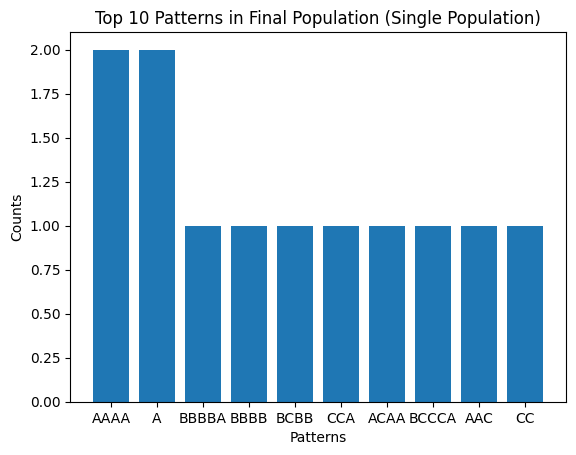


Simulating Population 1:

Simulating Population 2:

Mixing populations at generation 10...
Generation 0: Counter({'ZZZZC': 1})
Generation 1: Counter({'AX': 1, 'AY': 1, 'ZX': 1, 'YX': 1, 'CA': 1})
Generation 2: Counter({'YX': 1, 'AA': 1, 'YXA': 1, 'CZX': 1, 'XC': 1})
Generation 3: Counter({'ZAA': 1, 'XB': 1, 'ZA': 1, 'XCX': 1, 'BYX': 1})
Generation 4: Counter({'XZA': 1, 'ZAA': 1, 'ZAXCX': 1, 'AXB': 1, 'CY': 1})
Generation 5: Counter({'YZ': 1, 'CCY': 1, 'ZC': 1, 'AXBX': 1})
Generation 6: Counter({'XA': 1, 'YY': 1, 'YZY': 1, 'YC': 1})
Generation 7: Counter({'YZYB': 1, 'CYZY': 1, 'CZ': 1, 'CA': 1, 'YCYZY': 1})
Generation 8: Counter({'ZA': 1, 'BY': 1, 'YCZ': 1})
Generation 9: Counter({'XYCZ': 1, 'YCZY': 1, 'YYCZ': 1, 'BZA': 1, 'BA': 1})
Generation 10: Counter({'ZBZA': 1, 'BA': 1, 'CYCZY': 1, 'ZA': 1, 'XYCZY': 1})
Generation 11: Counter({'YC': 2, 'BY': 1, 'ZBZAZ': 1})
Generation 12: Counter({'YCBY': 1, 'BYA': 1, 'ABY': 1, 'YCYC': 1, 'CYC': 1})
Generation 13: Counter({'YB': 1, 'AZ': 1})
Gene

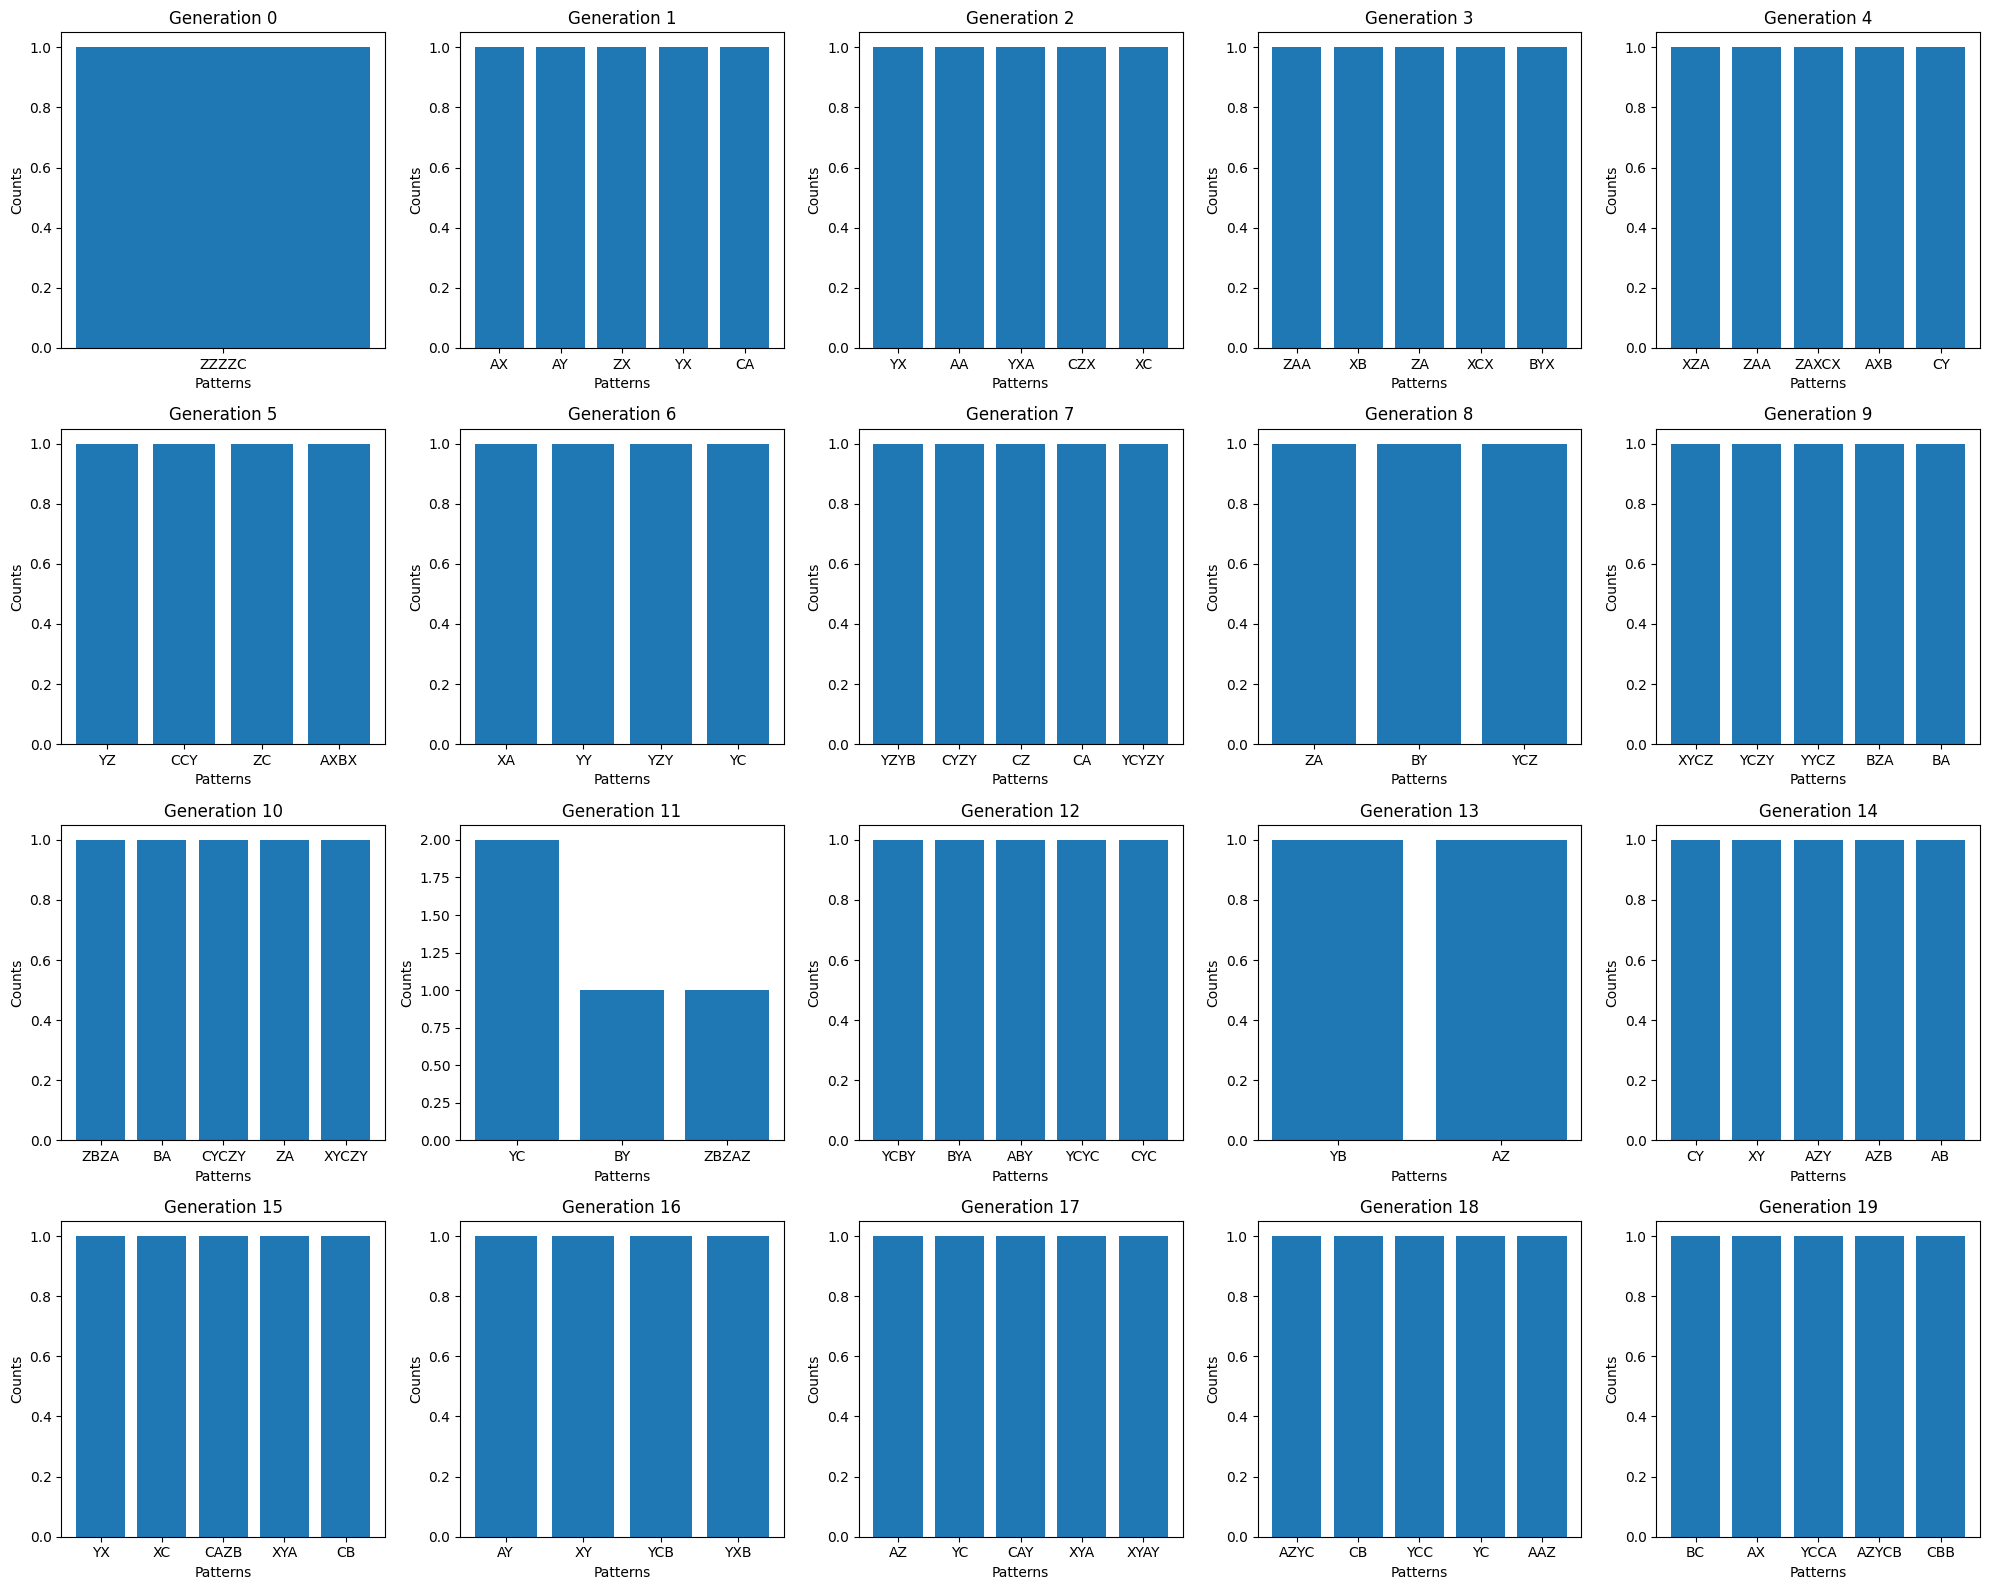

In [ ]:
import random
import matplotlib.pyplot as plt
from collections import Counter


def simulate_population_with_resources(
    initial_population, lifetimes, interactions_per_generation, num_generations, max_compound_size,
    initial_resources, energy_conversion_efficiency, resource_replenishment_rate, energy_recycling_rate,
    symbol_regeneration_rate
):
    """
    Simulate a single population with resource and energy dynamics, forming and decaying compounds.

    Args:
        initial_population (list): Initial list of symbols.
        lifetimes (dict): Dictionary of symbol lifetimes.
        interactions_per_generation (int): Number of interactions per generation.
        num_generations (int): Number of generations to simulate.
        max_compound_size (int): Maximum allowable size of compounds.
        initial_resources (int): Initial resources available.
        energy_conversion_efficiency (float): Fraction of resources converted into usable energy.
        resource_replenishment_rate (int): Rate of resource replenishment per generation.
        energy_recycling_rate (float): Fraction of energy recovered during compound decay.
        symbol_regeneration_rate (dict): Rate at which basic symbols are regenerated each generation.

    Returns:
        Counter: Final population count of all patterns.
    """
    population = initial_population.copy()
    symbol_lifetimes = lifetimes.copy()
    total_resources = initial_resources
    usable_energy = 0  # Initial usable energy

    for generation in range(num_generations):
        # Convert resources into usable energy
        energy_from_resources = energy_conversion_efficiency * total_resources
        usable_energy += energy_from_resources
        total_resources -= energy_from_resources

        # Interactions to form compounds
        for _ in range(interactions_per_generation):
            if len(population) < 1 or usable_energy <= 0:
                break

            # Randomly select one or two symbols for interaction
            if len(population) == 1 or random.random() < 0.5:
                symbol1 = random.choice(population)
                symbol2 = symbol1  # Allow self-interaction
            else:
                symbol1, symbol2 = random.sample(population, 2)

            # Form a compound
            compound = f"{symbol1}{symbol2}"
            compound_size = len(compound)
            energy_cost = compound_size  # Energy required is proportional to compound size
            if len(compound) <= max_compound_size and usable_energy >= energy_cost:
                max_lifetime = (
                    symbol_lifetimes.get(symbol1, float("inf"))
                    + symbol_lifetimes.get(symbol2, float("inf"))
                )
                symbol_lifetimes[compound] = max_lifetime
                population.remove(symbol1)
                if symbol1 != symbol2:
                    population.remove(symbol2)
                population.append(compound)
                usable_energy -= energy_cost

        # Decay large compounds and recycle energy
        updated_population = []
        for symbol in population:
            if len(symbol) > max_compound_size:
                updated_population.extend(list(symbol))
                usable_energy += energy_recycling_rate * len(symbol)
            else:
                updated_population.append(symbol)

        # Age the population and remove symbols past their lifetimes
        aged_population = []
        for symbol in updated_population:
            if symbol_lifetimes.get(symbol, float("inf")) > generation:
                aged_population.append(symbol)
        population = aged_population

        # Regenerate basic symbols
        for symbol, rate in symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

        # Replenish raw resources
        total_resources += resource_replenishment_rate

    return Counter(population)


def simulate_two_populations(
    pop1_params, pop2_params, mix_generation, num_generations_after_mix, max_compound_size
):
    """
    Simulate two populations, mix them at a specified generation, and add base elements in every generation.

    Args:
        pop1_params (dict): Parameters for the first population.
        pop2_params (dict): Parameters for the second population.
        mix_generation (int): The generation at which the two populations merge.
        num_generations_after_mix (int): Number of generations to simulate after mixing.
        max_compound_size (int): Maximum allowable size of compounds.

    Returns:
        None: Displays the population dynamics and histograms.
    """
    print("\nSimulating Population 1:")
    pop1_final = simulate_population_with_resources(**pop1_params)
    print("\nSimulating Population 2:")
    pop2_final = simulate_population_with_resources(**pop2_params)

    # Combine populations
    mixed_population = list(pop1_final.elements()) + list(pop2_final.elements())
    mixed_lifetimes = {**pop1_params["lifetimes"], **pop2_params["lifetimes"]}
    mixed_symbol_regeneration_rate = {
        k: pop1_params["symbol_regeneration_rate"].get(k, 0)
        + pop2_params["symbol_regeneration_rate"].get(k, 0)
        for k in set(
            pop1_params["symbol_regeneration_rate"].keys()
        ).union(pop2_params["symbol_regeneration_rate"].keys())
    }

    print(f"\nMixing populations at generation {mix_generation}...")

    # Add base elements in each generation
    def add_base_elements(population):
        for symbol, rate in mixed_symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

    fig, axes = plt.subplots(
        (num_generations_after_mix + 4) // 5, 5, figsize=(20, 4 * ((num_generations_after_mix + 4) // 5))
    )
    axes = axes.flatten()

    for generation in range(num_generations_after_mix):
        # Add base elements
        add_base_elements(mixed_population)

        # Simulate interactions
        new_population = []
        for _ in range(pop1_params["interactions_per_generation"]):
            symbol1, symbol2 = random.sample(mixed_population, 2)
            compound = f"{symbol1}{symbol2}"
            if len(compound) <= max_compound_size:
                new_population.append(compound)

        # Age compounds and remove large ones
        aged_population = [c for c in new_population if len(c) <= max_compound_size]
        mixed_population = aged_population

        # Count and plot top patterns
        population_count = Counter(mixed_population)
        top_patterns = population_count.most_common(6)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Generation {generation}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        print(f"Generation {generation}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations_after_mix, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Example Parameters
pop1_params = {
    "initial_population": ["A", "B", "C"] * 3,
    "lifetimes": {"A": 3, "B": 7, "C": 5},
    "interactions_per_generation": 5,
    "num_generations": 10,
    "max_compound_size": 5,
    "initial_resources": 100,
    "energy_conversion_efficiency": 0.2,
    "resource_replenishment_rate": 10,
    "energy_recycling_rate": 0.1,
    "symbol_regeneration_rate": {"A": 2, "B": 1, "C": 1},
}

pop2_params = {
    "initial_population": ["X", "Y", "Z"] * 3,
    "lifetimes": {"X": 4, "Y": 6, "Z": 8},
    "interactions_per_generation": 5,
    "num_generations": 10,
    "max_compound_size": 5,
    "initial_resources": 100,
    "energy_conversion_efficiency": 0.3,
    "resource_replenishment_rate": 15,
    "energy_recycling_rate": 0.15,
    "symbol_regeneration_rate": {"X": 1, "Y": 2, "Z": 1},
}

# Call to simulate a single population
def simulate_single_population():
    pop1_params = {
        "initial_population": ["A", "B", "C"] * 3,
        "lifetimes": {"A": 3, "B": 7, "C": 5},
        "interactions_per_generation": 5,
        "num_generations": 10,
        "max_compound_size": 5,
        "initial_resources": 100,
        "energy_conversion_efficiency": 0.2,
        "resource_replenishment_rate": 10,
        "energy_recycling_rate": 0.1,
        "symbol_regeneration_rate": {"A": 2, "B": 1, "C": 1},
    }

    # Run simulation for a single population
    print("\n=== Simulating Single Population ===")
    final_population = simulate_population_with_resources(**pop1_params)

    # Display top 10 patterns in the final population
    top_patterns = final_population.most_common(10)
    labels, counts = zip(*top_patterns)

    plt.bar(labels, counts)
    plt.xlabel("Patterns")
    plt.ylabel("Counts")
    plt.title("Top 10 Patterns in Final Population (Single Population)")
    plt.show()

simulate_single_population()

simulate_two_populations(
    pop1_params=pop1_params,
    pop2_params=pop2_params,
    mix_generation=10,
    num_generations_after_mix=20,
    max_compound_size=5,
)



=== Simulating Single Population with Enhanced Dynamics ===


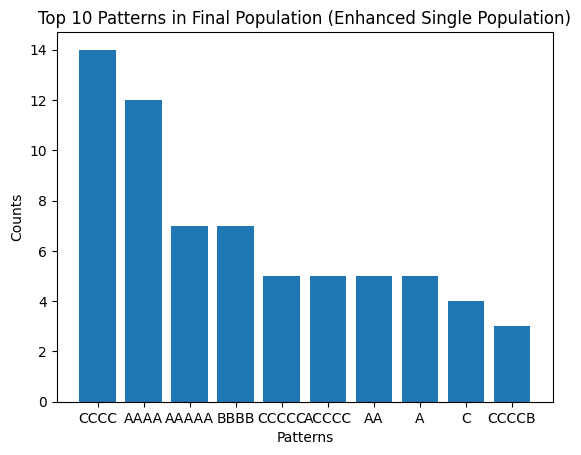

In [ ]:
# Adjusted single population simulation
def simulate_single_population():
    pop1_params = {
        "initial_population": ["A", "B", "C"] * 20,  # Larger initial population
        "lifetimes": {"A": 10, "B": 15, "C": 12},  # Longer lifetimes
        "interactions_per_generation": 100,  # More interactions per generation
        "num_generations": 20,  # Number of generations
        "max_compound_size": 5,  # Maximum compound size
        "initial_resources": 500,  # Increased initial resources
        "energy_conversion_efficiency": 0.5,  # More energy conversion
        "resource_replenishment_rate": 50,  # Higher resource replenishment
        "energy_recycling_rate": 0.2,  # More energy recycled
        "symbol_regeneration_rate": {"A": 5, "B": 3, "C": 4},  # Higher regeneration rates
    }

    # Run simulation for a single population
    print("\n=== Simulating Single Population with Enhanced Dynamics ===")
    final_population = simulate_population_with_resources(**pop1_params)

    # Display top 10 patterns in the final population
    top_patterns = final_population.most_common(10)
    labels, counts = zip(*top_patterns)

    plt.bar(labels, counts)
    plt.xlabel("Patterns")
    plt.ylabel("Counts")
    plt.title("Top 10 Patterns in Final Population (Enhanced Single Population)")
    plt.show()


simulate_single_population()



Simulating Enhanced Population 1:

Simulating Enhanced Population 2:

Mixing populations at generation 20...
Generation 0: Counter({'CYYYZ': 1, 'BY': 1, 'ZZZZX': 1, 'XXXXA': 1, 'ZZZZZ': 1, 'BBBBX': 1, 'CA': 1, 'AAACC': 1, 'XZZZZ': 1, 'BZZZZ': 1, 'AYYYY': 1, 'AB': 1, 'YYYYA': 1, 'XXBB': 1, 'XYY': 1, 'ZYYYY': 1, 'YZZZZ': 1, 'CZZXX': 1, 'CCCCB': 1, 'CX': 1, 'CCCCY': 1, 'XZXZZ': 1, 'ZZZA': 1, 'BABAZ': 1, 'ZXZXZ': 1, 'CC': 1})
Generation 1: Counter({'AZ': 5, 'CY': 3, 'AC': 3, 'BY': 3, 'XB': 2, 'YC': 2, 'YB': 2, 'BB': 2, 'ZZ': 2, 'CC': 2, 'CAY': 1, 'BAB': 1, 'XYYAB': 1, 'AX': 1, 'CA': 1, 'XX': 1, 'ACC': 1, 'ACA': 1, 'BBY': 1, 'ZCA': 1, 'XXBBA': 1, 'XXBBZ': 1, 'CCA': 1, 'ZZZZA': 1, 'ZZZAZ': 1, 'AA': 1, 'YX': 1, 'BC': 1, 'YXXBB': 1, 'XZ': 1, 'ZY': 1, 'ZX': 1, 'CXCA': 1, 'YCA': 1, 'ZB': 1, 'XYYC': 1, 'XYYY': 1})
Generation 2: Counter({'BBYY': 2, 'XBY': 2, 'AAZ': 2, 'AZZ': 2, 'YAX': 1, 'CYB': 1, 'ZBBY': 1, 'YCAYC': 1, 'XX': 1, 'CXYYC': 1, 'CB': 1, 'BZX': 1, 'AA': 1, 'CBB': 1, 'CCB': 1, 'YC': 1,

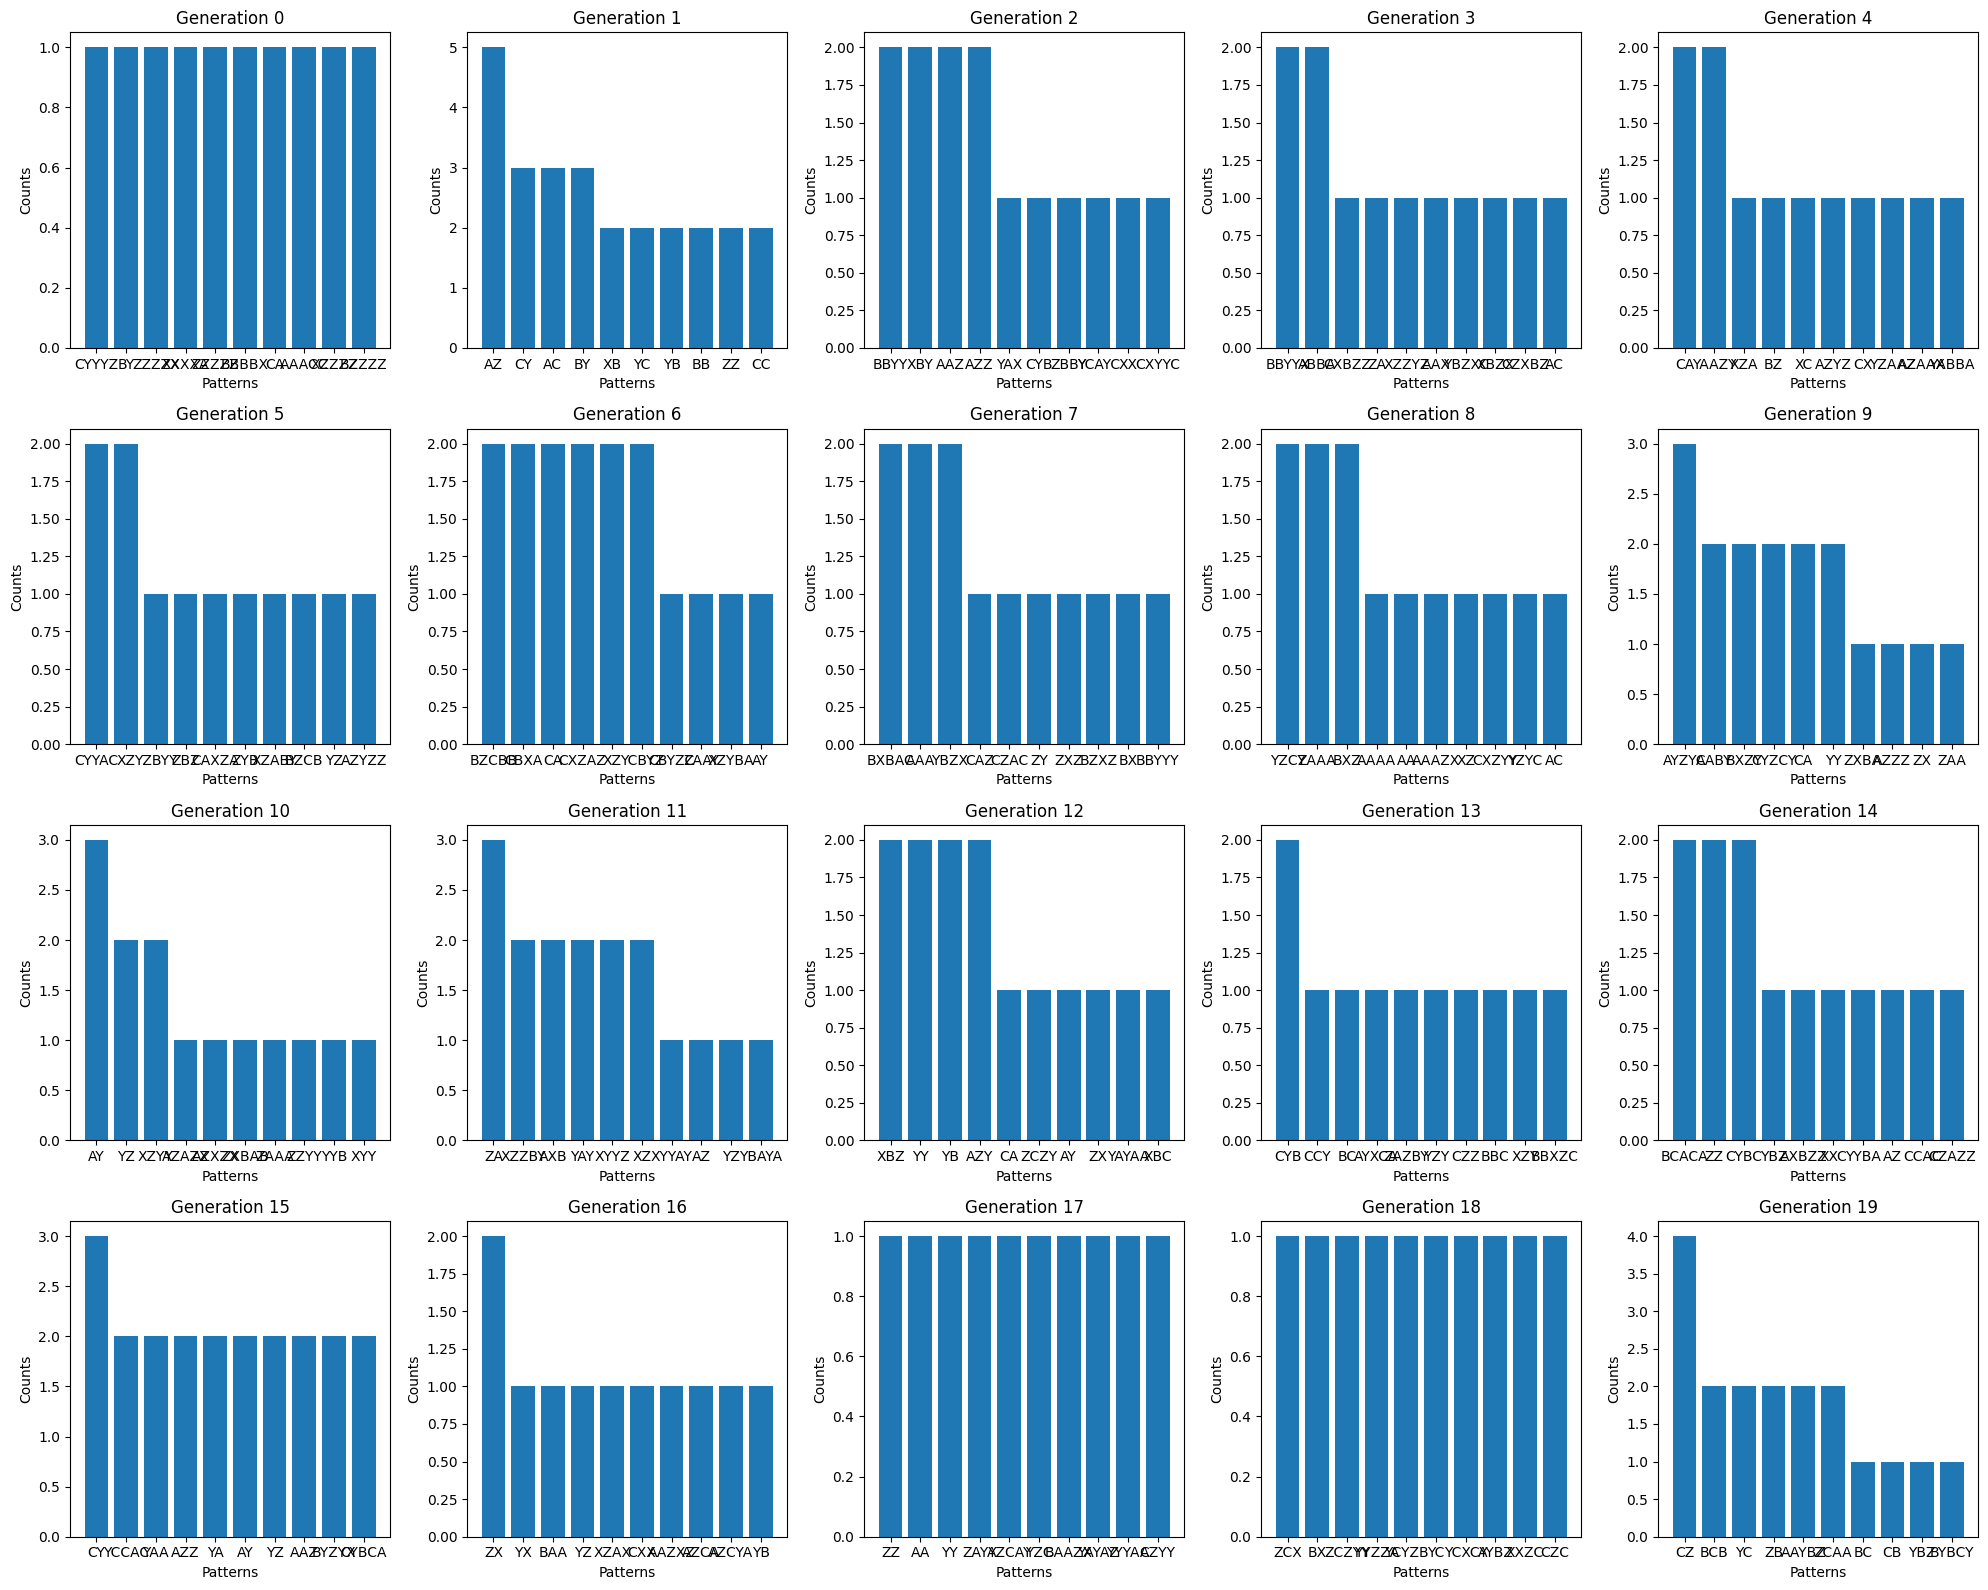

In [ ]:
def simulate_two_populations_with_enhanced_dynamics(
    pop1_params, pop2_params, mix_generation, num_generations_after_mix, max_compound_size
):
    """
    Simulate two enhanced populations and mix them at a specified generation.

    Args:
        pop1_params (dict): Parameters for the first population.
        pop2_params (dict): Parameters for the second population.
        mix_generation (int): The generation at which the two populations merge.
        num_generations_after_mix (int): Number of generations to simulate after merging.
        max_compound_size (int): Maximum allowable size of compounds.

    Returns:
        None: Displays the population dynamics and histograms.
    """
    print("\nSimulating Enhanced Population 1:")
    pop1_final = simulate_population_with_resources(**pop1_params)
    print("\nSimulating Enhanced Population 2:")
    pop2_final = simulate_population_with_resources(**pop2_params)

    # Combine populations
    mixed_population = list(pop1_final.elements()) + list(pop2_final.elements())
    mixed_lifetimes = {**pop1_params["lifetimes"], **pop2_params["lifetimes"]}
    mixed_symbol_regeneration_rate = {
        k: pop1_params["symbol_regeneration_rate"].get(k, 0)
        + pop2_params["symbol_regeneration_rate"].get(k, 0)
        for k in set(
            pop1_params["symbol_regeneration_rate"].keys()
        ).union(pop2_params["symbol_regeneration_rate"].keys())
    }

    print(f"\nMixing populations at generation {mix_generation}...")

    # Add base elements in each generation
    def add_base_elements(population):
        for symbol, rate in mixed_symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

    fig, axes = plt.subplots(
        (num_generations_after_mix + 4) // 5, 5, figsize=(20, 4 * ((num_generations_after_mix + 4) // 5))
    )
    axes = axes.flatten()

    for generation in range(num_generations_after_mix):
        # Add base elements
        add_base_elements(mixed_population)

        # Simulate interactions
        new_population = []
        for _ in range(pop1_params["interactions_per_generation"]):
            symbol1, symbol2 = random.sample(mixed_population, 2)
            compound = f"{symbol1}{symbol2}"
            if len(compound) <= max_compound_size:
                new_population.append(compound)

        # Age compounds and remove large ones
        aged_population = [c for c in new_population if len(c) <= max_compound_size]
        mixed_population = aged_population

        # Count and plot top patterns
        population_count = Counter(mixed_population)
        top_patterns = population_count.most_common(10)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Generation {generation}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        print(f"Generation {generation}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations_after_mix, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for two enhanced populations
pop1_params = {
    "initial_population": ["A", "B", "C"] * 20,  # Larger initial population
    "lifetimes": {"A": 10, "B": 15, "C": 12},
    "interactions_per_generation": 100,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 500,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 50,
    "energy_recycling_rate": 0.2,
    "symbol_regeneration_rate": {"A": 5, "B": 3, "C": 4},
}

pop2_params = {
    "initial_population": ["X", "Y", "Z"] * 20,  # Larger initial population
    "lifetimes": {"X": 12, "Y": 14, "Z": 16},
    "interactions_per_generation": 100,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 500,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 50,
    "energy_recycling_rate": 0.2,
    "symbol_regeneration_rate": {"X": 4, "Y": 6, "Z": 5},
}

# Run enhanced simulation for two populations with mixing
simulate_two_populations_with_enhanced_dynamics(
    pop1_params=pop1_params,
    pop2_params=pop2_params,
    mix_generation=20,
    num_generations_after_mix=20,
    max_compound_size=5,
)



Simulating Population 1:

Simulating Population 2:

Mixing populations at generation 20...
Generation 0: Counter({'A': 10, 'Y': 10, 'X': 9, 'C': 9, 'Z': 8, 'B': 8, 'YAAAA': 2, 'XXY': 2, 'YY': 1, 'CYY': 1, 'ACBBB': 1, 'BXX': 1, 'YYYYZ': 1, 'AA': 1, 'CYYYY': 1, 'XYYYX': 1, 'ABBAC': 1, 'YYY': 1, 'BAY': 1, 'XXXXY': 1, 'XZYZY': 1, 'ZXZB': 1, 'XXXXX': 1, 'CCCCZ': 1, 'YYYYB': 1, 'BC': 1, 'YZZ': 1, 'AAAAC': 1, 'CC': 1, 'ZXYY': 1, 'CB': 1, 'AY': 1, 'ZZZZ': 1, 'BXXXX': 1, 'CAAAA': 1, 'BCCCC': 1, 'BYYYY': 1, 'ZBB': 1, 'BXXYY': 1})
Generation 1: Counter({'A': 10, 'Y': 10, 'X': 9, 'C': 9, 'Z': 8, 'B': 8, 'YB': 7, 'XY': 7, 'CY': 6, 'XZ': 6, 'CC': 5, 'XB': 5, 'XA': 4, 'BX': 4, 'BY': 4, 'AA': 4, 'YZ': 4, 'CA': 4, 'AC': 4, 'ZC': 3, 'ZX': 3, 'BB': 3, 'BC': 3, 'ZZ': 3, 'CZ': 3, 'YC': 3, 'ZA': 3, 'XC': 3, 'AZ': 3, 'BZ': 3, 'YY': 2, 'BA': 2, 'XX': 2, 'YX': 2, 'AB': 2, 'AX': 2, 'AY': 2, 'ZZZZB': 1, 'XXYB': 1, 'BXXX': 1, 'ACYY': 1, 'CCYY': 1, 'ZBAY': 1, 'XCYY': 1, 'CCA': 1, 'XXYY': 1, 'ZB': 1, 'YYZ': 1, 'CC

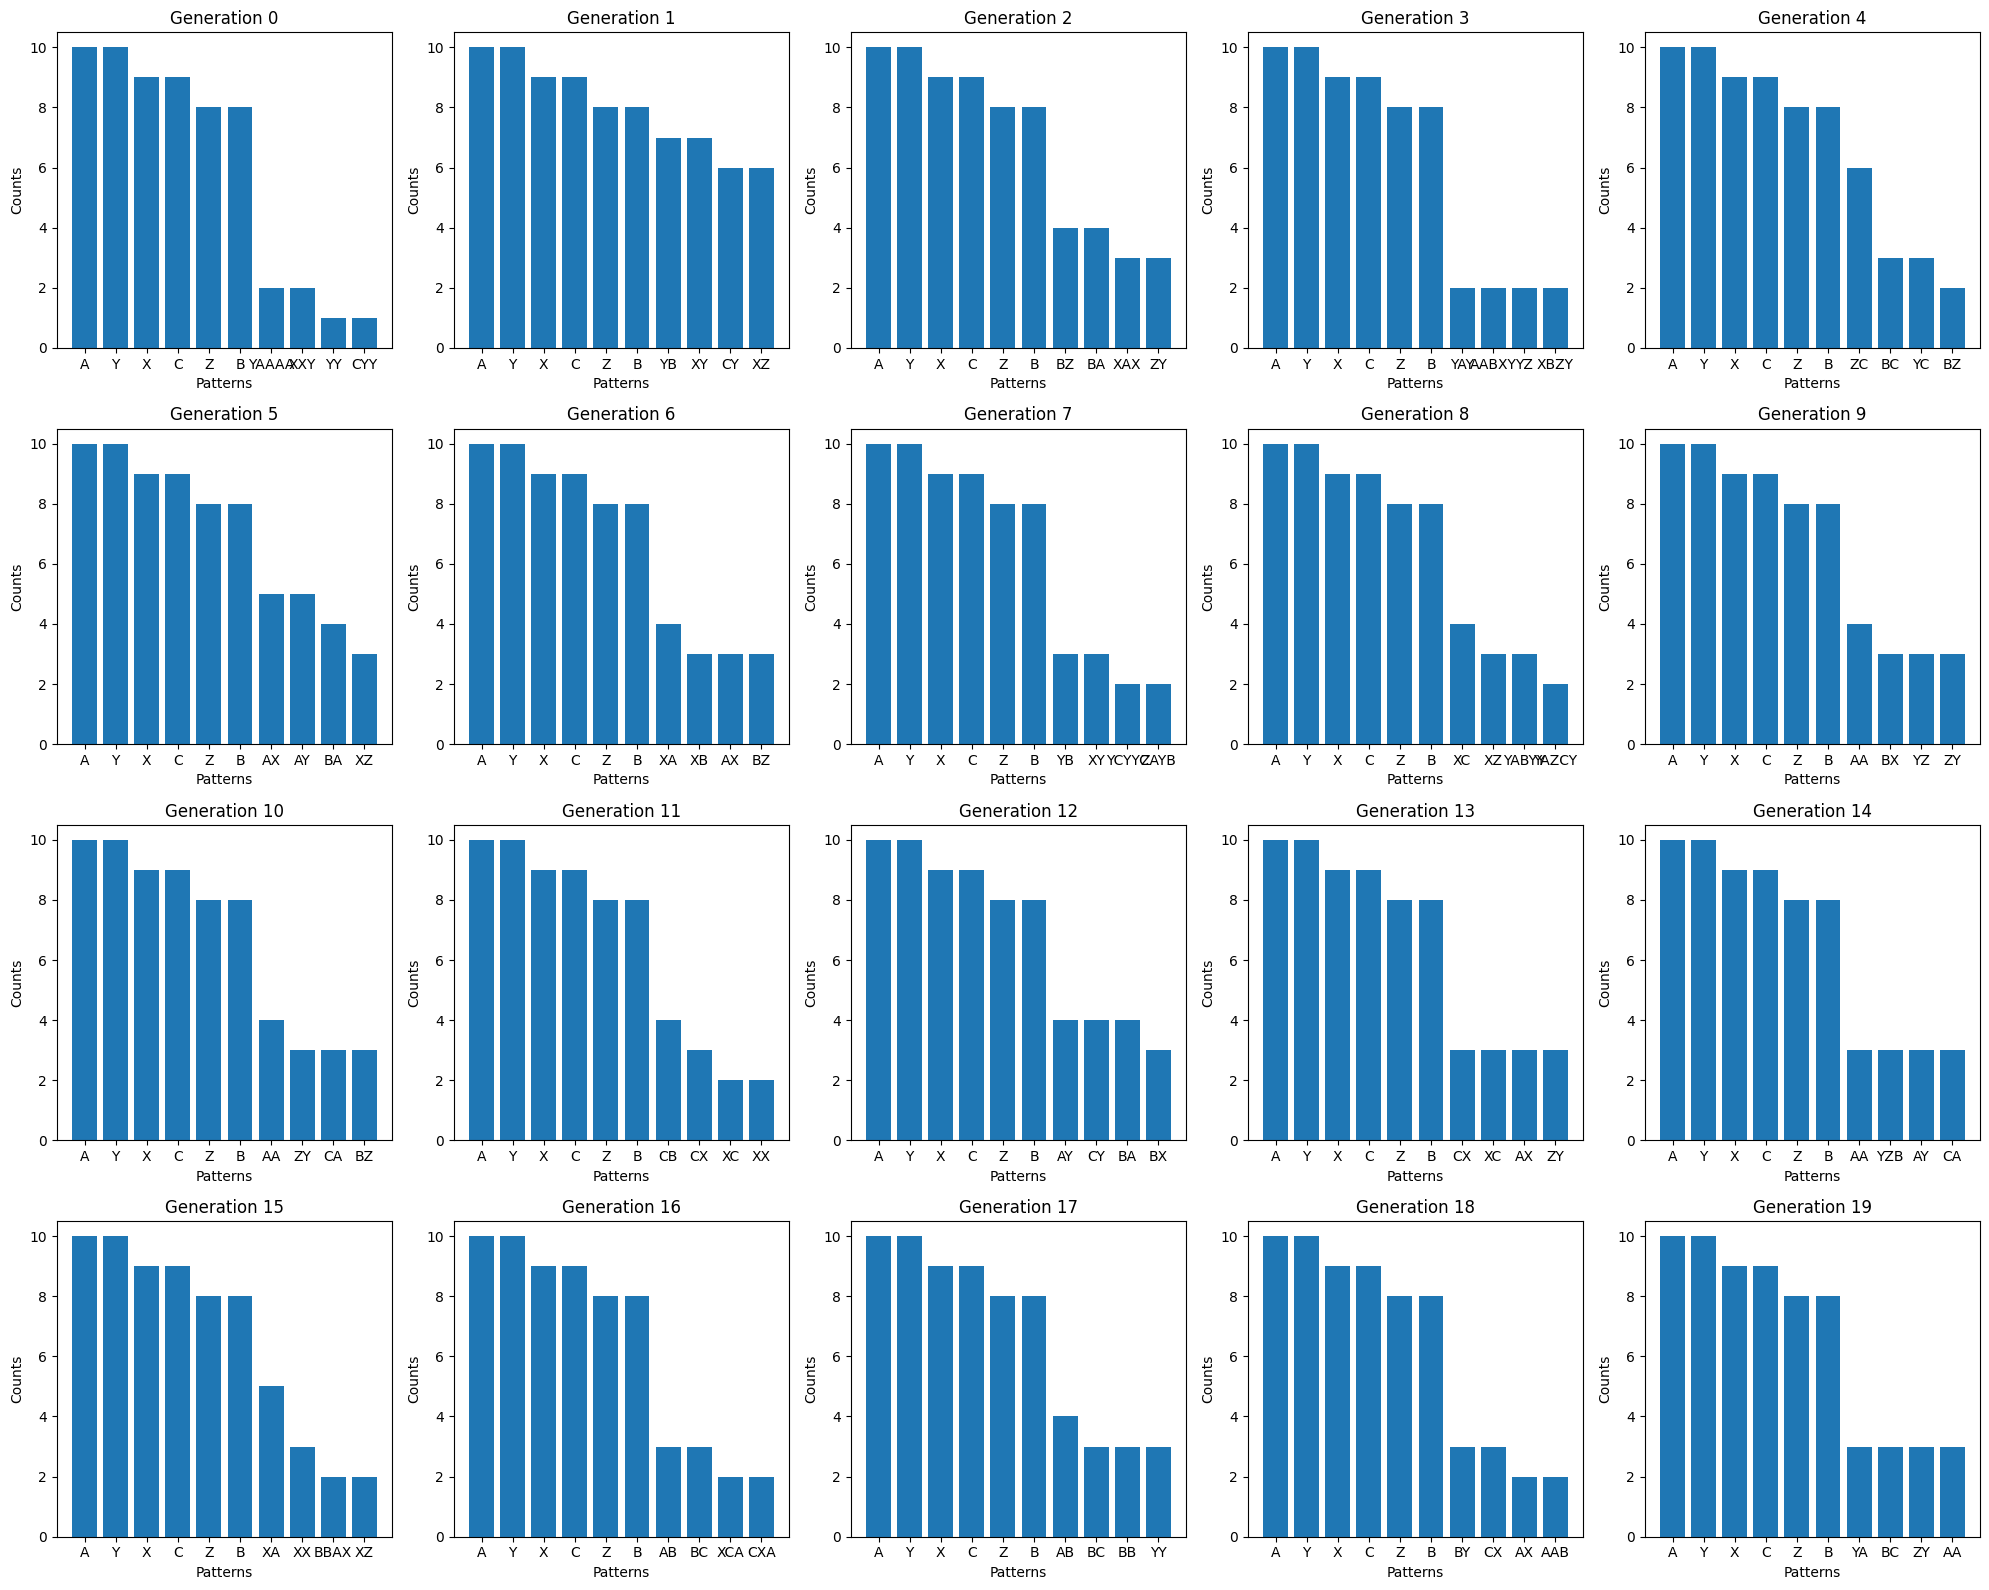

In [ ]:
def simulate_two_populations_with_focused_frequency(
    pop1_params, pop2_params, mix_generation, num_generations_after_mix, max_compound_size
):
    """
    Simulate two populations and mix them with mechanisms to emphasize high symbol frequencies.

    Args:
        pop1_params (dict): Parameters for the first population.
        pop2_params (dict): Parameters for the second population.
        mix_generation (int): The generation at which the two populations merge.
        num_generations_after_mix (int): Number of generations to simulate after merging.
        max_compound_size (int): Maximum allowable size of compounds.

    Returns:
        None: Displays the population dynamics and histograms.
    """
    print("\nSimulating Population 1:")
    pop1_final = simulate_population_with_resources(**pop1_params)
    print("\nSimulating Population 2:")
    pop2_final = simulate_population_with_resources(**pop2_params)

    # Combine populations
    mixed_population = list(pop1_final.elements()) + list(pop2_final.elements())
    mixed_lifetimes = {**pop1_params["lifetimes"], **pop2_params["lifetimes"]}
    mixed_symbol_regeneration_rate = {
        k: pop1_params["symbol_regeneration_rate"].get(k, 0)
        + pop2_params["symbol_regeneration_rate"].get(k, 0)
        for k in set(
            pop1_params["symbol_regeneration_rate"].keys()
        ).union(pop2_params["symbol_regeneration_rate"].keys())
    }

    print(f"\nMixing populations at generation {mix_generation}...")

    # Add base elements in each generation
    def add_base_elements(population):
        for symbol, rate in mixed_symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

    fig, axes = plt.subplots(
        (num_generations_after_mix + 4) // 5, 5, figsize=(20, 4 * ((num_generations_after_mix + 4) // 5))
    )
    axes = axes.flatten()

    for generation in range(num_generations_after_mix):
        # Add base elements
        add_base_elements(mixed_population)

        # Simulate interactions
        new_population = []
        for _ in range(pop1_params["interactions_per_generation"]):
            symbol1, symbol2 = random.sample(mixed_population, 2)
            compound = f"{symbol1}{symbol2}"
            if len(compound) <= max_compound_size:
                new_population.append(compound)

        # Reinforce high-frequency base patterns
        for base_symbol, rate in mixed_symbol_regeneration_rate.items():
            if base_symbol in mixed_lifetimes:
                for _ in range(rate):
                    new_population.append(base_symbol)

        # Age compounds and remove large ones
        aged_population = [c for c in new_population if len(c) <= max_compound_size]
        mixed_population = aged_population

        # Count and plot top patterns
        population_count = Counter(mixed_population)
        top_patterns = population_count.most_common(10)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Generation {generation}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        print(f"Generation {generation}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations_after_mix, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Example Parameters for Populations
pop1_params = {
    "initial_population": ["A", "B", "C"] * 50,  # Larger initial population
    "lifetimes": {"A": 15, "B": 20, "C": 18},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"A": 10, "B": 8, "C": 9},
}

pop2_params = {
    "initial_population": ["X", "Y", "Z"] * 50,  # Larger initial population
    "lifetimes": {"X": 18, "Y": 22, "Z": 20},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"X": 9, "Y": 10, "Z": 8},
}

# Run the enhanced simulation for two populations with focused frequency dynamics
simulate_two_populations_with_focused_frequency(
    pop1_params=pop1_params,
    pop2_params=pop2_params,
    mix_generation=20,
    num_generations_after_mix=20,
    max_compound_size=5,
)



Simulating Population 1:

Simulating Population 2:

Mixing populations at generation 20...
Generation 0: Counter({'YYYYY': 2, 'AAAAA': 2, 'ZA': 1, 'CBCX': 1, 'AX': 1, 'BBBBA': 1, 'YZZZZ': 1, 'YYYYZ': 1, 'YYYYC': 1, 'BBBBX': 1})
Generation 1: Counter({'ZA': 11, 'CY': 7, 'YY': 6, 'ZC': 6, 'YA': 6, 'XY': 6, 'YZ': 5, 'YC': 4, 'CC': 4, 'AC': 4, 'AZ': 4, 'YX': 3, 'XB': 3, 'CA': 3, 'ZZ': 3, 'CZ': 3, 'YZA': 2, 'CBCXB': 2, 'BY': 2, 'YB': 2, 'AXZ': 2, 'ZB': 2, 'CX': 2, 'YAX': 2, 'AXA': 2, 'AY': 2, 'AX': 2, 'AXC': 2, 'AAX': 1, 'AXY': 1, 'ZAX': 1, 'CBCXY': 1, 'ZX': 1, 'XZA': 1, 'ZZA': 1, 'AXB': 1, 'ZAY': 1, 'XZ': 1, 'BC': 1, 'ACBCX': 1, 'ZAA': 1, 'AB': 1, 'XCBCX': 1, 'ZY': 1, 'ZAZ': 1, 'ZAZA': 1, 'XC': 1, 'XX': 1})
Generation 2: Counter({'YYB': 4, 'YAY': 4, 'YYZ': 3, 'ZAZA': 3, 'CAZA': 2, 'YZZ': 2, 'ZAXB': 2, 'AZXY': 2, 'YZA': 2, 'ZZA': 2, 'ACAZ': 2, 'AXYZ': 2, 'XBY': 2, 'ZAXY': 2, 'YCZA': 2, 'YCYA': 2, 'ZAXXY': 2, 'ZCYY': 1, 'AXB': 1, 'CZAB': 1, 'AXAZA': 1, 'YZY': 1, 'ZCZAX': 1, 'ZZACC': 1, 'XYC

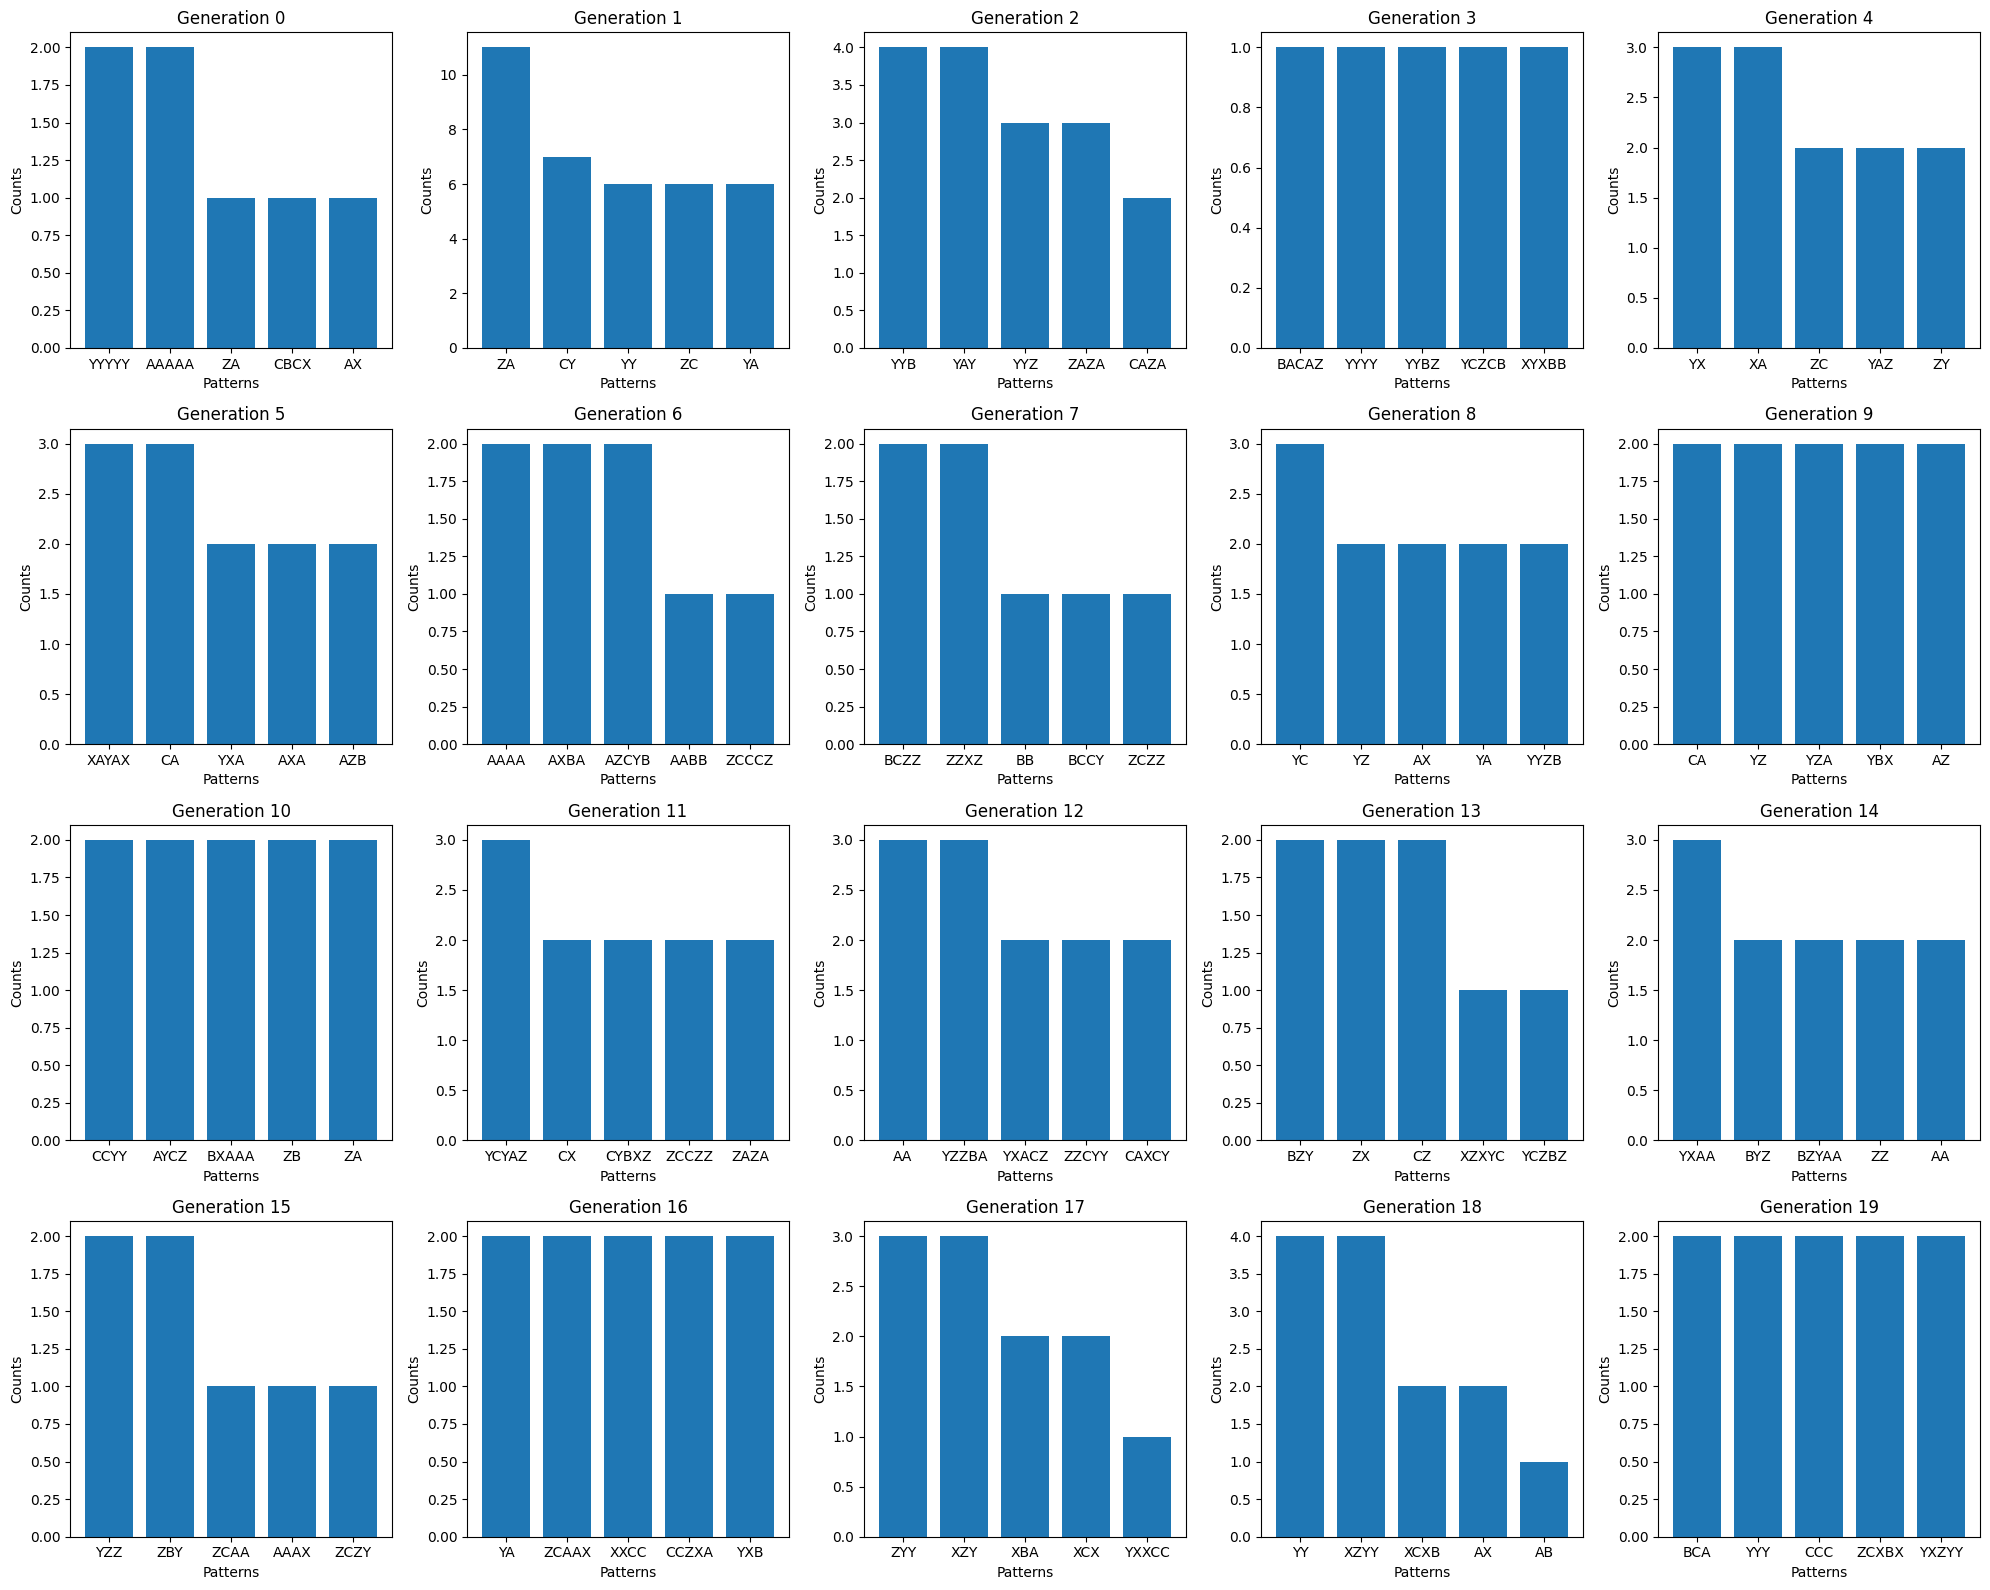

In [ ]:
def simulate_two_populations_with_compound_focus(
    pop1_params, pop2_params, mix_generation, num_generations_after_mix, max_compound_size
):
    """
    Simulate two populations and mix them, focusing on promoting compound formation.

    Args:
        pop1_params (dict): Parameters for the first population.
        pop2_params (dict): Parameters for the second population.
        mix_generation (int): The generation at which the two populations merge.
        num_generations_after_mix (int): Number of generations to simulate after merging.
        max_compound_size (int): Maximum allowable size of compounds.

    Returns:
        None: Displays the population dynamics and histograms.
    """
    print("\nSimulating Population 1:")
    pop1_final = simulate_population_with_resources(**pop1_params)
    print("\nSimulating Population 2:")
    pop2_final = simulate_population_with_resources(**pop2_params)

    # Combine populations
    mixed_population = list(pop1_final.elements()) + list(pop2_final.elements())
    mixed_lifetimes = {**pop1_params["lifetimes"], **pop2_params["lifetimes"]}
    mixed_symbol_regeneration_rate = {
        k: pop1_params["symbol_regeneration_rate"].get(k, 0)
        + pop2_params["symbol_regeneration_rate"].get(k, 0)
        for k in set(
            pop1_params["symbol_regeneration_rate"].keys()
        ).union(pop2_params["symbol_regeneration_rate"].keys())
    }

    print(f"\nMixing populations at generation {mix_generation}...")

    # Add base elements in each generation
    def add_base_elements(population):
        for symbol, rate in mixed_symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

    fig, axes = plt.subplots(
        (num_generations_after_mix + 4) // 5, 5, figsize=(20, 4 * ((num_generations_after_mix + 4) // 5))
    )
    axes = axes.flatten()

    for generation in range(num_generations_after_mix):
        # Add base elements
        add_base_elements(mixed_population)

        # Simulate interactions with a bias toward compounds
        new_population = []
        for _ in range(pop1_params["interactions_per_generation"]):
            if random.random() < 0.7:  # 70% chance to involve a compound in interactions
                symbol1 = random.choice(mixed_population)
                symbol2 = random.choice(mixed_population)
            else:  # 30% chance to involve only base symbols
                symbol1, symbol2 = random.sample(mixed_population, 2)

            compound = f"{symbol1}{symbol2}"
            if len(compound) <= max_compound_size:
                new_population.append(compound)

        # Extend compound lifetimes dynamically
        for compound in new_population:
            if compound not in mixed_lifetimes:
                mixed_lifetimes[compound] = max(
                    mixed_lifetimes.get(symbol1, 0), mixed_lifetimes.get(symbol2, 0)
                ) + 5  # Add a stability boost to compounds

        # Age compounds and remove large ones
        aged_population = [c for c in new_population if len(c) <= max_compound_size]
        mixed_population = aged_population

        # Count and plot top patterns
        population_count = Counter(mixed_population)
        top_patterns = population_count.most_common(5)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Generation {generation}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        print(f"Generation {generation}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations_after_mix, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for two enhanced populations
pop1_params = {
    "initial_population": ["A", "B", "C"] * 50,  # Larger initial population
    "lifetimes": {"A": 10, "B": 15, "C": 12},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"A": 5, "B": 3, "C": 4},
}

pop2_params = {
    "initial_population": ["X", "Y", "Z"] * 50,  # Larger initial population
    "lifetimes": {"X": 12, "Y": 18, "Z": 15},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"X": 4, "Y": 6, "Z": 5},
}

# Run the simulation with a focus on compounds
simulate_two_populations_with_compound_focus(
    pop1_params=pop1_params,
    pop2_params=pop2_params,
    mix_generation=20,
    num_generations_after_mix=20,
    max_compound_size=5,
)



Simulating Population 1:

Simulating Population 2:

Mixing populations at generation 20...
Generation 0: Counter({'XXXXC': 2, 'YYYZ': 1, 'XXXXZ': 1, 'YCCCC': 1, 'AYYYY': 1, 'BYYYY': 1, 'BBBBX': 1, 'YYYYB': 1, 'BBBBZ': 1, 'YYYYY': 1, 'AA': 1, 'ZB': 1, 'CZYYY': 1, 'ZA': 1, 'CZZ': 1, 'BBBBA': 1, 'BZZZZ': 1, 'CCCCY': 1, 'ZZ': 1, 'XXXXX': 1})
Generation 1: Counter({'XX': 12, 'YY': 8, 'XY': 5, 'YZ': 5, 'CC': 4, 'YC': 4, 'AC': 4, 'ZX': 4, 'CA': 3, 'XC': 3, 'ZY': 3, 'BY': 3, 'YA': 3, 'YZZ': 3, 'BX': 3, 'CZ': 3, 'ZZ': 3, 'CX': 3, 'ZA': 2, 'CY': 2, 'XZ': 2, 'AZ': 2, 'AAC': 2, 'YX': 2, 'CZZ': 1, 'YZA': 1, 'CB': 1, 'AZB': 1, 'BZA': 1, 'CCZZ': 1, 'YAA': 1, 'XA': 1, 'ZC': 1, 'AA': 1, 'CYYYZ': 1, 'YB': 1, 'AAX': 1, 'YYYZC': 1, 'ZAZ': 1, 'XZA': 1, 'BAA': 1, 'ZZCZZ': 1, 'YZB': 1, 'ZAAA': 1, 'XYYYZ': 1, 'AZZ': 1, 'CZZX': 1, 'AY': 1, 'BB': 1})
Generation 2: Counter({'XXX': 5, 'ZC': 3, 'XYC': 3, 'YY': 3, 'CC': 3, 'YXX': 3, 'XXCA': 2, 'CAYC': 2, 'YYZY': 2, 'YCC': 2, 'CCBZA': 2, 'AX': 2, 'XXXX': 2, 'XYZ': 

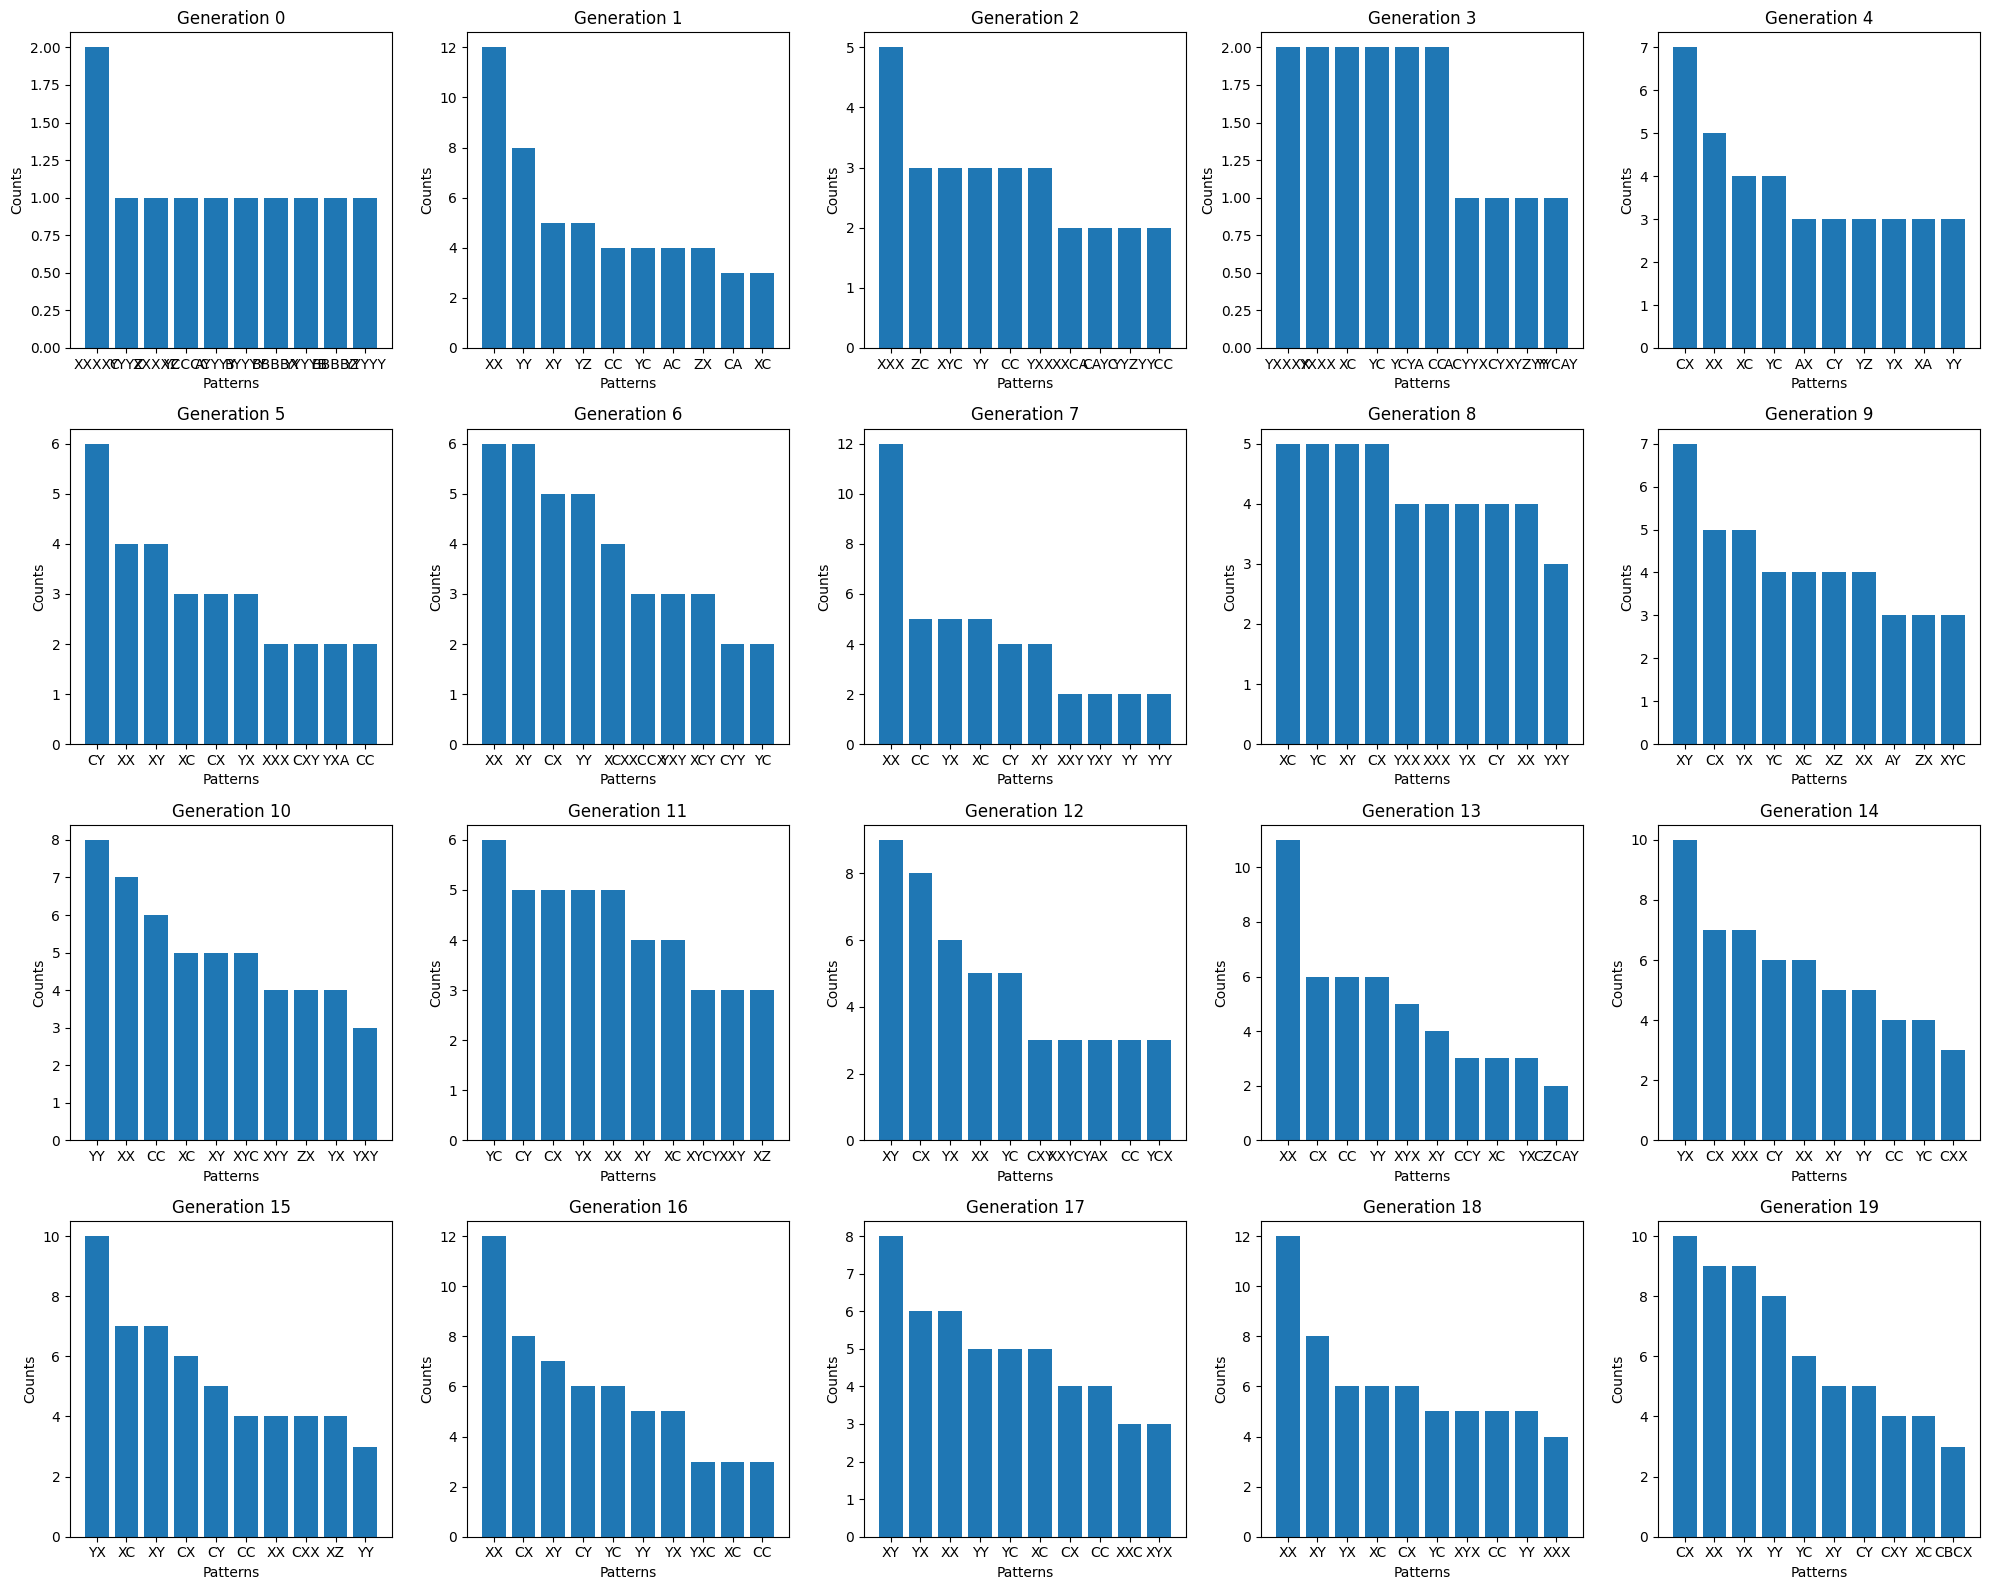

In [ ]:
def simulate_two_populations_with_stable_patterns(
    pop1_params, pop2_params, mix_generation, num_generations_after_mix, max_compound_size
):
    """
    Simulate two populations with mechanisms to reinforce stable patterns.

    Args:
        pop1_params (dict): Parameters for the first population.
        pop2_params (dict): Parameters for the second population.
        mix_generation (int): The generation at which the two populations merge.
        num_generations_after_mix (int): Number of generations to simulate after merging.
        max_compound_size (int): Maximum allowable size of compounds.

    Returns:
        None: Displays the population dynamics and histograms.
    """
    print("\nSimulating Population 1:")
    pop1_final = simulate_population_with_resources(**pop1_params)
    print("\nSimulating Population 2:")
    pop2_final = simulate_population_with_resources(**pop2_params)

    # Combine populations
    mixed_population = list(pop1_final.elements()) + list(pop2_final.elements())
    mixed_lifetimes = {**pop1_params["lifetimes"], **pop2_params["lifetimes"]}
    mixed_symbol_regeneration_rate = {
        k: pop1_params["symbol_regeneration_rate"].get(k, 0)
        + pop2_params["symbol_regeneration_rate"].get(k, 0)
        for k in set(
            pop1_params["symbol_regeneration_rate"].keys()
        ).union(pop2_params["symbol_regeneration_rate"].keys())
    }

    print(f"\nMixing populations at generation {mix_generation}...")

    # Add base elements in each generation
    def add_base_elements(population):
        for symbol, rate in mixed_symbol_regeneration_rate.items():
            population.extend([symbol] * rate)

    # Reinforce stable patterns
    def reinforce_stable_patterns(population, population_count):
        dominant_patterns = population_count.most_common(5)  # Top 5 patterns
        for pattern, count in dominant_patterns:
            if len(pattern) > 1:  # Only reinforce compounds
                for symbol in pattern:
                    mixed_symbol_regeneration_rate[symbol] += 1  # Increment regeneration rate

    fig, axes = plt.subplots(
        (num_generations_after_mix + 4) // 5, 5, figsize=(20, 4 * ((num_generations_after_mix + 4) // 5))
    )
    axes = axes.flatten()

    for generation in range(num_generations_after_mix):
        # Add base elements
        add_base_elements(mixed_population)

        # Simulate interactions with a bias toward stable patterns
        new_population = []
        for _ in range(pop1_params["interactions_per_generation"]):
            if random.random() < 0.7:  # 70% chance to involve dominant symbols
                symbol1 = random.choice(mixed_population)
                symbol2 = random.choice(mixed_population)
            else:  # 30% chance for random interaction
                symbol1, symbol2 = random.sample(mixed_population, 2)

            compound = f"{symbol1}{symbol2}"
            if len(compound) <= max_compound_size:
                new_population.append(compound)

        # Extend compound lifetimes dynamically
        for compound in new_population:
            if compound not in mixed_lifetimes:
                mixed_lifetimes[compound] = max(
                    mixed_lifetimes.get(symbol1, 0), mixed_lifetimes.get(symbol2, 0)
                ) + 10  # Add a persistence bonus for new compounds

        # Age compounds and remove large ones
        aged_population = [c for c in new_population if len(c) <= max_compound_size]
        mixed_population = aged_population

        # Count and reinforce stable patterns
        population_count = Counter(mixed_population)
        reinforce_stable_patterns(mixed_population, population_count)

        # Count and plot top patterns
        top_patterns = population_count.most_common(10)
        labels, counts = zip(*top_patterns) if top_patterns else ([], [])
        ax = axes[generation]
        ax.bar(labels, counts)
        ax.set_title(f"Generation {generation}")
        ax.set_xlabel("Patterns")
        ax.set_ylabel("Counts")

        print(f"Generation {generation}: {population_count}")

    # Hide unused subplot axes
    for i in range(num_generations_after_mix, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Parameters for two enhanced populations
pop1_params = {
    "initial_population": ["A", "B", "C"] * 50,
    "lifetimes": {"A": 10, "B": 15, "C": 12},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"A": 5, "B": 3, "C": 4},
}

pop2_params = {
    "initial_population": ["X", "Y", "Z"] * 50,
    "lifetimes": {"X": 12, "Y": 18, "Z": 15},
    "interactions_per_generation": 200,
    "num_generations": 20,
    "max_compound_size": 5,
    "initial_resources": 1000,
    "energy_conversion_efficiency": 0.5,
    "resource_replenishment_rate": 100,
    "energy_recycling_rate": 0.3,
    "symbol_regeneration_rate": {"X": 4, "Y": 6, "Z": 5},
}

# Run simulation with focus on stable patterns
simulate_two_populations_with_stable_patterns(
    pop1_params=pop1_params,
    pop2_params=pop2_params,
    mix_generation=20,
    num_generations_after_mix=20,
    max_compound_size=5,
)


CA Rules

In [1]:
import random
from collections import Counter

def generate_ca_rule(symbols, stability):
    """
    Generate a CA rule based on probabilistic interactions between symbols.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for combinations of symbols.
    Returns:
        str: A CA rule in the form "(s1, s2, s3) -> outcome".
    """
    s1, s2, s3 = random.choices(symbols, k=3)
    combination = s1 + s2 + s3
    outcome = random.choice(symbols)  # Random outcome state
    stability_score = stability.get(combination, 0)
    if random.random() < stability_score / max(stability.values()):
        return f"({s1}, {s2}, {s3}) -> {outcome}"
    return None

def apply_ca_rule(state, rule, size):
    """
    Apply a CA rule to a given state.
    Args:
        state (list): Current state of the CA.
        rule (str): Rule to apply.
        size (int): Size of the CA.
    Returns:
        list: Next state of the CA.
    """
    rule_dict = {}
    lhs, rhs = rule.split("->")
    lhs = lhs.strip("() ").split(", ")
    rule_dict[tuple(lhs)] = rhs.strip()
    next_state = []
    for i in range(size):
        neighborhood = (state[(i - 1) % size], state[i], state[(i + 1) % size])
        next_state.append(rule_dict.get(neighborhood, state[i]))  # Default to current state
    return next_state

def simulate_ca(symbols, stability, num_generations, size):
    """
    Simulate a CA using physical-like rule formation.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for combinations.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
    """
    # Generate initial state
    state = [random.choice(symbols) for _ in range(size)]
    print(f"Initial State: {''.join(state)}")

    # Generate rules
    rules = []
    for _ in range(10):  # Generate 10 rules
        rule = generate_ca_rule(symbols, stability)
        if rule:
            rules.append(rule)
    print(f"Generated Rules: {rules}")

    # Apply rules and evolve CA
    for gen in range(num_generations):
        for rule in rules:
            state = apply_ca_rule(state, rule, size)
        print(f"Generation {gen + 1}: {''.join(state)}")

# Define symbols and stability
symbols = ['A', 'B', 'C']
stability = {
    'AAB': 3, 'ABC': 4, 'BCB': 5, 'AAC': 1, 'ACA': 2,  # Higher stability for B-compounds
}

# Run the simulation
simulate_ca(symbols, stability, num_generations=10, size=20)


Initial State: ACBBBBCACCBAABABCCAA
Generated Rules: ['(A, B, C) -> C', '(B, C, B) -> B', '(A, A, B) -> A']
Generation 1: ACBBBBCACCBAABACCCAA
Generation 2: ACBBBBCACCBAABACCCAA
Generation 3: ACBBBBCACCBAABACCCAA
Generation 4: ACBBBBCACCBAABACCCAA
Generation 5: ACBBBBCACCBAABACCCAA
Generation 6: ACBBBBCACCBAABACCCAA
Generation 7: ACBBBBCACCBAABACCCAA
Generation 8: ACBBBBCACCBAABACCCAA
Generation 9: ACBBBBCACCBAABACCCAA
Generation 10: ACBBBBCACCBAABACCCAA


In [3]:
import random
from collections import Counter

def generate_ca_rule(symbols, stability):
    """
    Generate a CA rule based on probabilistic interactions between symbols.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for combinations of symbols.
    Returns:
        str: A CA rule in the form "(s1, s2, s3) -> outcome".
    """
    s1, s2, s3 = random.choices(symbols, k=3)
    combination = s1 + s2 + s3
    outcome = random.choice(symbols)  # Random outcome state
    stability_score = stability.get(combination, 0)
    if random.random() < stability_score / max(stability.values()):
        return f"({s1}, {s2}, {s3}) -> {outcome}"
    return None

def apply_ca_rule(state, rules, size):
    """
    Apply a set of CA rules to a given state.
    Args:
        state (list): Current state of the CA.
        rules (list): List of rules to apply.
        size (int): Size of the CA.
    Returns:
        list: Next state of the CA.
    """
    rule_dict = {}
    for rule in rules:
        lhs, rhs = rule.split("->")
        lhs = lhs.strip("() ").split(", ")
        rule_dict[tuple(lhs)] = rhs.strip()

    next_state = []
    for i in range(size):
        neighborhood = (state[(i - 1) % size], state[i], state[(i + 1) % size])
        next_state.append(rule_dict.get(neighborhood, state[i]))  # Default to current state
    return next_state

def regenerate_symbols(state, symbols, regeneration_rate):
    """
    Regenerate base symbols into the state.
    Args:
        state (list): Current state of the CA.
        symbols (list): List of base symbols.
        regeneration_rate (dict): Regeneration rate for each symbol.
    Returns:
        list: State with regenerated symbols.
    """
    for symbol, rate in regeneration_rate.items():
        state.extend([symbol] * rate)
    random.shuffle(state)
    return state

def simulate_ca_with_regeneration(symbols, stability, num_generations, size, regeneration_rate):
    """
    Simulate a CA using physical-like rule formation with regeneration.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for combinations.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
        regeneration_rate (dict): Regeneration rate for each symbol.
    """
    # Generate initial state
    state = [random.choice(symbols) for _ in range(size)]
    print(f"Initial State: {''.join(state)}")

    # Generate rules
    rules = []
    for _ in range(10):  # Generate 10 rules
        rule = generate_ca_rule(symbols, stability)
        if rule:
            rules.append(rule)
    print(f"Generated Rules: {rules}")

    # Apply rules and evolve CA
    for gen in range(num_generations):
        state = apply_ca_rule(state, rules, size)
        state = regenerate_symbols(state, symbols, regeneration_rate)
        print(f"Generation {gen + 1}: {''.join(state)}")

# Define symbols and stability
symbols = ['A', 'B', 'C']
stability = {
    'AAB': 3, 'ABC': 4, 'BCB': 5, 'AAC': 1, 'ACA': 2,  # Higher stability for B-compounds
}

# Define regeneration rates
regeneration_rate = {'A': 2, 'B': 3, 'C': 2}  # Replenish symbols each generation

# Run the simulation
simulate_ca_with_regeneration(symbols, stability, num_generations=10, size=20, regeneration_rate=regeneration_rate)


Initial State: ACAACACBBACCBCCBBBCB
Generated Rules: []
Generation 1: BBBBAACAACCCACBCCABBCBBCCBA
Generation 2: BAACCBCCBBBABACBBAAAACCCBCB
Generation 3: ABBBBABCCBBACAAAAACBBCCBBCA
Generation 4: CCAAABABACBCBAAABABCBABBBCB
Generation 5: BAAABCCCBBACACABBCABBAACABA
Generation 6: CABBBABBACBBAAACBCBCBAACCCA
Generation 7: AACACABABBABBCBCCCBBCBBABAB
Generation 8: CACBBCBCABABCBABACCACBBBABA
Generation 9: CBBBBCCCACBACBBBABCBAAAACCA
Generation 10: BBABACABBCCCABCCBCCCBBABBBB


Initial State: BBABBCBBCACBBCBBBABA
Generated Rules: ['(A, A, B) -> B']
Generation 1: ABBBBBCAACBBABBCABBC
Generation 2: BAABCCAABBBCABBBBCCB
Generation 3: CBBBBCCBACABBBBCACBB
Generation 4: BBBBCBBBABBCBBABCBAA
Generation 5: BBABABCBCBBABBBBBCCB
Generation 6: BABBBACBBABBCCACBCBB
Generation 7: BABBCACCBBBABCBBBCAB
Generation 8: BCABABCCBBCABBCABABB
Generation 9: CBBCCBAAAABBCCBCBBBC
Generation 10: BAAACCCCBCBCBBBBBBAB


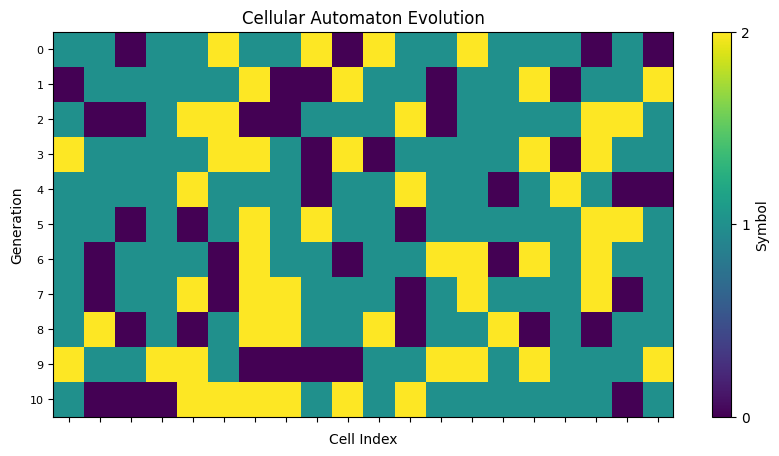

In [5]:
def regenerate_symbols(state, symbols, regeneration_rate, size):
    """
    Regenerate base symbols into the state while ensuring the state remains the correct size.
    Args:
        state (list): Current state of the CA.
        symbols (list): List of base symbols.
        regeneration_rate (dict): Regeneration rate for each symbol.
        size (int): Desired size of the state after regeneration.
    Returns:
        list: State with regenerated symbols, truncated to the correct size.
    """
    for symbol, rate in regeneration_rate.items():
        state.extend([symbol] * rate)
    random.shuffle(state)
    return state[:size]  # Ensure the state is truncated to the desired size

def simulate_and_visualize_ca(symbols, stability, num_generations, size, regeneration_rate):
    """
    Simulate a CA using physical-like rule formation with regeneration and visualize it.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for combinations.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
        regeneration_rate (dict): Regeneration rate for each symbol.
    """
    # Generate initial state
    state = [random.choice(symbols) for _ in range(size)]
    print(f"Initial State: {''.join(state)}")

    # Generate rules
    rules = []
    for _ in range(10):  # Generate 10 rules
        rule = generate_ca_rule(symbols, stability)
        if rule:
            rules.append(rule)
    print(f"Generated Rules: {rules}")

    # Simulate CA and store states
    grid = [state.copy()]
    for gen in range(num_generations):
        state = apply_ca_rule(state, rules, size)
        state = regenerate_symbols(state, symbols, regeneration_rate, size)  # Ensure correct size
        grid.append(state.copy())
        print(f"Generation {gen + 1}: {''.join(state)}")

    # Visualize the CA
    visualize_ca(grid, symbols)

# Define symbols and stability
symbols = ['A', 'B', 'C']
stability = {
    'AAB': 3, 'ABC': 4, 'BCB': 5, 'AAC': 1, 'ACA': 2,  # Higher stability for B-compounds
}

# Define regeneration rates
regeneration_rate = {'A': 2, 'B': 3, 'C': 2}  # Replenish symbols each generation

# Run the simulation and visualize
simulate_and_visualize_ca(symbols, stability, num_generations=10, size=20, regeneration_rate=regeneration_rate)


Initial State: CBAACBAABCABCACBBABCABACCCBACAAACBCABBAB
Generated Rule: {('A', 'A', 'B'): 'B', ('A', 'A', 'C'): 'A', ('A', 'B', 'A'): 'B', ('A', 'B', 'B'): 'B', ('A', 'B', 'C'): 'B', ('A', 'C', 'A'): 'C', ('A', 'C', 'B'): 'A', ('A', 'C', 'C'): 'B', ('B', 'A', 'A'): 'C', ('B', 'A', 'B'): 'B', ('B', 'A', 'C'): 'A', ('B', 'B', 'B'): 'B', ('B', 'B', 'C'): 'B', ('B', 'C', 'A'): 'A', ('B', 'C', 'C'): 'A', ('C', 'A', 'B'): 'B', ('C', 'A', 'C'): 'A', ('C', 'B', 'A'): 'C', ('C', 'B', 'B'): 'B', ('C', 'B', 'C'): 'C', ('C', 'C', 'A'): 'A', ('C', 'C', 'B'): 'A'}


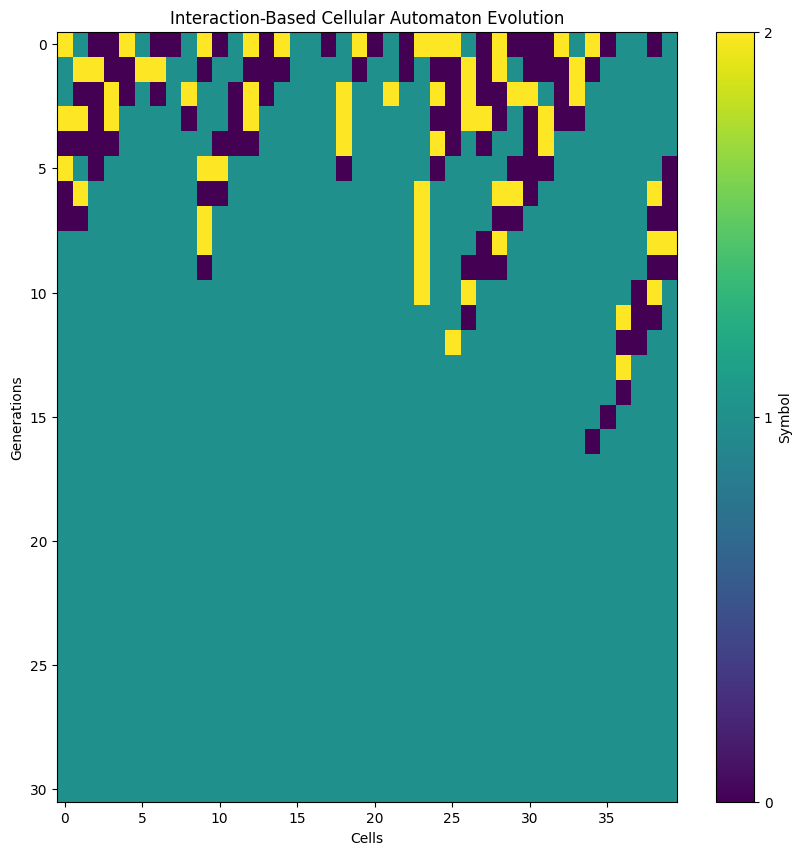

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Generate interaction-based rules from symbols
def generate_interaction_rule(symbols, stability):
    """
    Generate a CA rule based on symbolic interactions and stability.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for symbol combinations.
    Returns:
        dict: A generated CA rule in the form {neighborhood: outcome}.
    """
    rule = {}
    for s1 in symbols:
        for s2 in symbols:
            for s3 in symbols:
                neighborhood = (s1, s2, s3)
                key = "".join(neighborhood)
                if random.random() < stability.get(key, 0.5):  # Use stability to bias rule generation
                    rule[neighborhood] = random.choice(symbols)
    return rule

# Apply a rule to a CA state
def apply_interaction_rule(state, rule, symbols):
    """
    Apply an interaction-based CA rule to evolve a state.
    Args:
        state (list): Current CA state.
        rule (dict): Rule dictionary.
        symbols (list): List of symbols.
    Returns:
        list: Next state.
    """
    size = len(state)
    next_state = []
    for i in range(size):
        neighborhood = (
            state[(i - 1) % size],  # Left neighbor
            state[i],              # Current cell
            state[(i + 1) % size]  # Right neighbor
        )
        next_state.append(rule.get(neighborhood, random.choice(symbols)))  # Default fallback
    return next_state

# Simulate the evolution of the CA
def simulate_and_visualize_interaction_ca(symbols, stability, num_generations, size):
    """
    Simulate and visualize a symbolic interaction CA.
    Args:
        symbols (list): List of symbols (e.g., ['A', 'B', 'C']).
        stability (dict): Stability values for symbol combinations.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
    """
    # Initialize random state
    state = [random.choice(symbols) for _ in range(size)]
    print(f"Initial State: {''.join(state)}")

    # Generate rule based on interactions and stability
    rule = generate_interaction_rule(symbols, stability)
    print(f"Generated Rule: {rule}")

    # Store all generations
    generations = [state]

    # Evolve CA for the specified number of generations
    for _ in range(num_generations):
        state = apply_interaction_rule(state, rule, symbols)
        generations.append(state)

    # Convert to numeric format for visualization
    symbol_map = {symbol: i for i, symbol in enumerate(symbols)}
    numeric_grid = np.array([[symbol_map[cell] for cell in gen] for gen in generations])

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(numeric_grid, cmap='viridis', aspect='auto')
    plt.colorbar(ticks=range(len(symbols)), label="Symbol")
    plt.title("Interaction-Based Cellular Automaton Evolution")
    plt.xlabel("Cells")
    plt.ylabel("Generations")
    plt.show()

# Define symbols and stability imbalances
symbols = ['A', 'B', 'C']
stability = {
    'AAA': 0.1, 'AAB': 0.9, 'AAC': 0.3,
    'ABA': 0.8, 'ABB': 0.9, 'ABC': 0.7,
    'BAA': 0.4, 'BAB': 0.6, 'BAC': 0.8,
    'BBA': 0.2, 'BBB': 0.5, 'BBC': 0.9,
    'CAA': 0.3, 'CAB': 0.8, 'CAC': 0.6,
    'CBA': 0.7, 'CBB': 0.9, 'CBC': 0.4,
    'CCC': 0.1
}

# Simulate and visualize
simulate_and_visualize_interaction_ca(symbols, stability, num_generations=30, size=40)


Initial State: 1001111000000101111100100000111001001001
Generated Rule: {('0', '0', '1'): '1', ('0', '1', '1'): '1', ('1', '0', '0'): '1', ('1', '0', '1'): '1', ('1', '1', '0'): '1', ('1', '1', '1'): '1'}


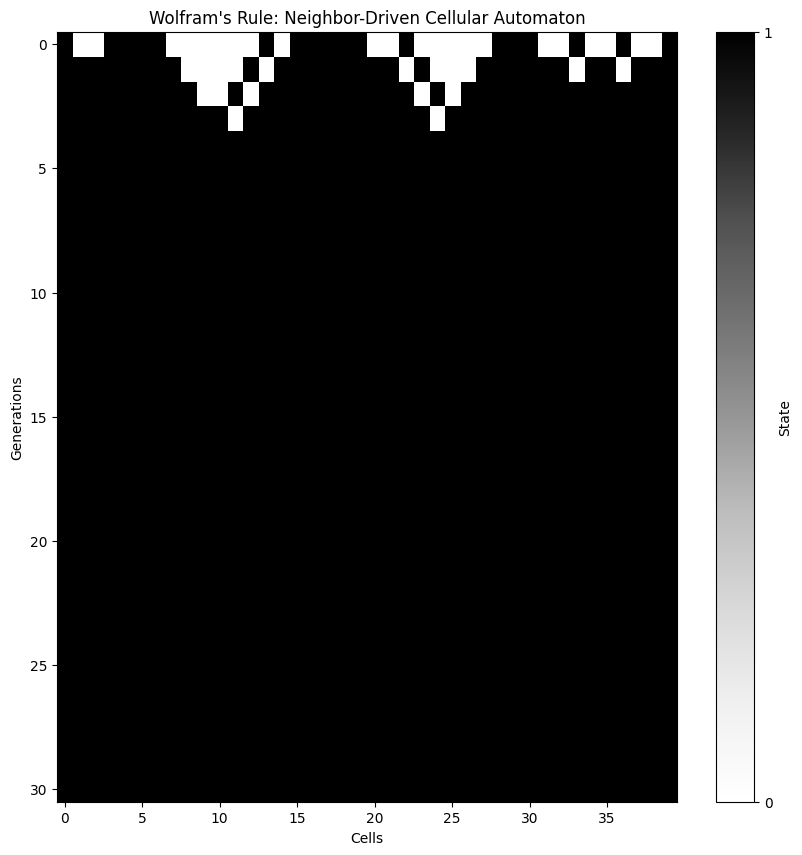

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_wolfram_neighbor_rule(symbols, stability):
    """
    Generate a CA rule based on stability relationships for Wolfram's rule.
    Args:
        symbols (list): List of symbols (e.g., ['0', '1']).
        stability (dict): Stability values for combinations.
    Returns:
        dict: A generated CA rule in the form {neighborhood: outcome}.
    """
    rule = {}
    for s1 in symbols:
        for s2 in symbols:
            for s3 in symbols:
                neighborhood = (s1, s2, s3)
                key = "".join(neighborhood)
                # Stability reflects the preference for black ('1') when neighbors are black
                if random.random() < stability.get(key, 0.5):
                    if s1 == '1' or s3 == '1':  # Either neighbor is black
                        rule[neighborhood] = '1'
                    else:
                        rule[neighborhood] = '0'
    return rule

def apply_ca_rule(state, rule):
    """
    Apply the generated rule to a given state.
    Args:
        state (list): Current CA state.
        rule (dict): Rule dictionary.
    Returns:
        list: The next CA state.
    """
    size = len(state)
    next_state = []
    for i in range(size):
        neighborhood = (
            state[(i - 1) % size],  # Left neighbor
            state[i],              # Current cell
            state[(i + 1) % size]  # Right neighbor
        )
        next_state.append(rule.get(neighborhood, '0'))  # Default to '0' (white)
    return next_state

def simulate_and_visualize_wolfram_ca(symbols, stability, num_generations, size):
    """
    Simulate and visualize the CA evolution for Wolfram's rule.
    Args:
        symbols (list): List of symbols (e.g., ['0', '1']).
        stability (dict): Stability values for combinations.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
    """
    # Initialize random state
    state = [random.choice(symbols) for _ in range(size)]
    print(f"Initial State: {''.join(state)}")

    # Generate rule based on stability
    rule = generate_wolfram_neighbor_rule(symbols, stability)
    print(f"Generated Rule: {rule}")

    # Store generations
    generations = [state]

    # Simulate generations
    for _ in range(num_generations):
        state = apply_ca_rule(state, rule)
        generations.append(state)

    # Convert to numeric grid for visualization
    symbol_map = {symbol: i for i, symbol in enumerate(symbols)}
    numeric_grid = np.array([[symbol_map[cell] for cell in gen] for gen in generations])

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(numeric_grid, cmap='Greys', aspect='auto')  # Greys for binary CA
    plt.colorbar(ticks=range(len(symbols)), label="State")
    plt.title("Wolfram's Rule: Neighbor-Driven Cellular Automaton")
    plt.xlabel("Cells")
    plt.ylabel("Generations")
    plt.show()

# Define symbols and stability
symbols = ['0', '1']  # Binary states: '0' (white), '1' (black)
stability = {
    '000': 0.1, '001': 0.8, '010': 0.3,
    '011': 0.9, '100': 0.8, '101': 0.7,
    '110': 0.9, '111': 0.5  # Higher stability for black neighbors
}

# Simulate and visualize
simulate_and_visualize_wolfram_ca(symbols, stability, num_generations=30, size=40)


Initial State: ['AB', 'AC', 'AC', 'AC', 'AC', 'AC', 'AC', 'AC', 'AC', 'AC', '', '', '', '', '', '', '', '', '', '']


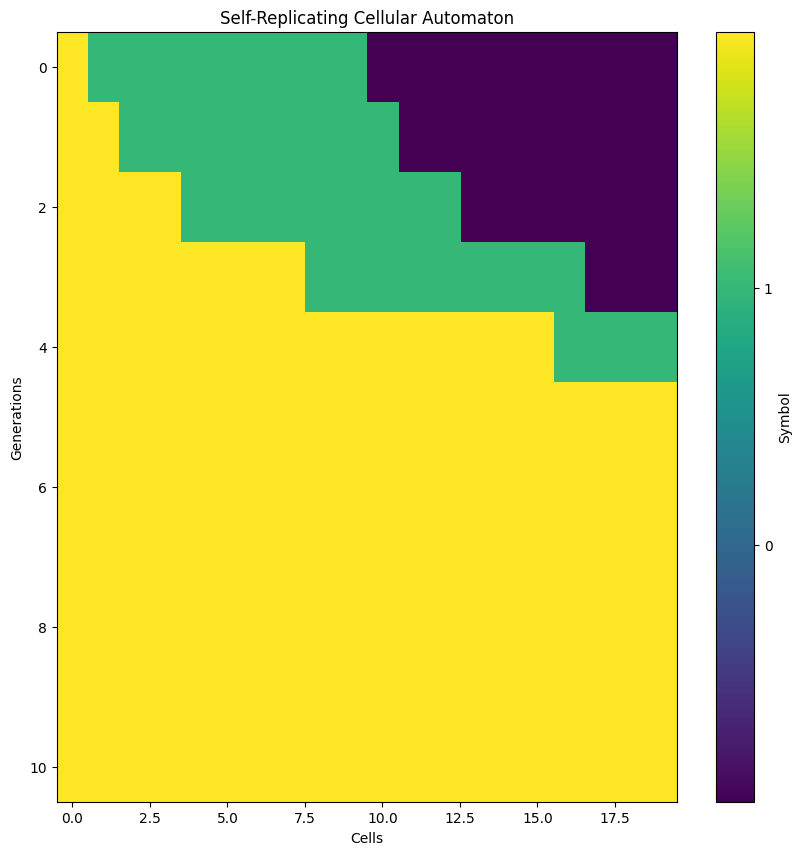

In [10]:
import random
from collections import Counter
import matplotlib.pyplot as plt

def apply_replication_rule(state, rules, size):
    """
    Apply the replication rule to evolve the state.
    Args:
        state (list): Current CA state as pairs.
        rules (dict): Replication rules.
        size (int): Size of the CA.
    Returns:
        list: Next state of the CA.
    """
    next_state = []
    for i in range(len(state)):
        pair = state[i]
        if pair in rules:
            next_state.extend(rules[pair])  # Replication: produce two identical pairs
        else:
            next_state.append(pair)  # Default: keep the current pair
    return next_state[:size]  # Ensure the next state matches the CA size

def pad_state(state, size):
    """
    Pad the state to ensure it has a consistent size.
    Args:
        state (list): Current state.
        size (int): Desired size of the state.
    Returns:
        list: Padded state.
    """
    if len(state) < size:
        state += [''] * (size - len(state))  # Pad with empty symbols
    return state[:size]

def simulate_and_visualize_self_replication(initial_state, rules, num_generations, size):
    """
    Simulate and visualize a self-replicating CA based on symbolic rules.
    Args:
        initial_state (list): Initial CA state as pairs.
        rules (dict): Replication rules.
        num_generations (int): Number of generations to simulate.
        size (int): Size of the CA.
    """
    state = pad_state(initial_state[:size], size)
    print(f"Initial State: {state}")

    # Store all generations
    generations = [state]

    # Simulate generations
    for _ in range(num_generations):
        state = apply_replication_rule(state, rules, size)
        state = pad_state(state, size)  # Ensure consistent size
        generations.append(state)

    # Convert to a numeric grid for visualization
    symbol_map = {symbol: i for i, symbol in enumerate(set(sum(generations, []))) if symbol}
    numeric_grid = [[symbol_map.get(cell, -1) for cell in gen] for gen in generations]

    # Plot the results
    plt.figure(figsize=(10, 10))
    plt.imshow(numeric_grid, cmap='viridis', aspect='auto')
    plt.colorbar(ticks=range(len(symbol_map)), label="Symbol")
    plt.title("Self-Replicating Cellular Automaton")
    plt.xlabel("Cells")
    plt.ylabel("Generations")
    plt.show()

# Define the replication rules
replication_rules = {
    'AB': ['AB', 'AB'],  # Replicates itself
    'AC': ['AC'],        # Does not replicate
    'BC': ['BC'],        # Does not replicate
    'AA': ['AA'],        # Neutral (no replication)
    'BB': ['BB']         # Neutral (no replication)
}

# Define the initial state
initial_state = ['AB'] + ['AC'] * 9  # Start with one replicating pair and others

# Simulate and visualize
simulate_and_visualize_self_replication(initial_state, replication_rules, num_generations=10, size=20)
